# ReCell Project

## Description
### Context
Buying and selling used smartphones used to be something that happened on a handful of online marketplace sites. But the used and refurbished phone market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth $52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used smartphones that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing a smartphone. There are plenty of other benefits associated with the used smartphone market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished smartphones. Maximizing the longevity of mobile phones through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost the cheaper refurbished smartphone segment, as consumers cut back on discretionary spending and buy phones only for immediate needs.

 

### Objective
The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished smartphones. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone and identify factors that significantly influence it.

 

### Data Description
The data contains the different attributes of used/refurbished phones. The detailed data dictionary is given below.

## Data Dictionary

- `brand_name`: Name of manufacturing brand
- `os`: OS on which the phone runs
- `screen_size`: Size of the screen in cm
- `4g`: Whether 4G is available or not
- `5g`: Whether 5G is available or not
- `main_camera_mp`: Resolution of the rear camera in megapixels
- `selfie_camera_mp`: Resolution of the front camera in megapixels
- `int_memory`: Amount of internal memory (ROM) in GB
- `ram`: Amount of RAM in GB
- `battery`: Energy capacity of the phone battery in mAh
- `weight`: Weight of the phone in grams
- `release_year`: Year when the phone model was released
- `days_used`: Number of days the used/refurbished phone has been used
- `new_price`: Price of a new phone of the same model in euros
- `used_price`: Price of the used/refurbished phone in euros

## Importing necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
data = pd.read_csv("used_phone_data.csv")

<IPython.core.display.Javascript object>

## Data Overview

In [3]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.62,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.39,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.47,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.93,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.87,103.80


<IPython.core.display.Javascript object>

In [4]:
data.sample(n=5)

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
235,Honor,Android,16.67,yes,no,13.0,8.0,64.0,3.0,3020.0,150.0,2020,228,108.8200,79.15
2067,Motorola,Android,12.70,yes,no,8.0,5.0,32.0,4.0,2800.0,140.6,2016,659,100.2200,40.11
3371,Oppo,Android,16.03,yes,no,8.0,16.0,128.0,4.0,5000.0,195.0,2019,459,152.9915,76.41
2779,Sony,Android,16.03,yes,no,NaN,8.0,64.0,4.0,3330.0,180.0,2019,328,999.7400,650.33
2390,Others,Windows,10.16,no,no,5.0,0.3,16.0,4.0,2500.0,154.0,2015,930,59.7200,17.82


<IPython.core.display.Javascript object>

In [5]:
# check number of rows and columns
data.shape

(3571, 15)

<IPython.core.display.Javascript object>

- There are 3571 observations(rows) and 15 features(columns) in the dataset. 
- The majority of them are numerical except for a few which are categorical variables. 

In [6]:
# checking column datatypes and number of non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

- Again, a total of 3571 observations and 15 features
- There are three different datatypes
    1. float64(9)
    2. int64(2)
    3. object/categorical(4)
        - `brand_name`, `os`, `4g`, and `5g`
- Column names do not have any spaces or special characters so they will stay as is. 

In [7]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3391.0,NaN,NaN,NaN,9.400454,4.818396,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3569.0,NaN,NaN,NaN,6.547352,6.879359,0.3,2.0,5.0,8.0,32.0
int_memory,3561.0,NaN,NaN,NaN,54.532607,84.696246,0.005,16.0,32.0,64.0,1024.0
ram,3561.0,NaN,NaN,NaN,4.056962,1.391844,0.03,4.0,4.0,4.0,16.0
battery,3565.0,NaN,NaN,NaN,3067.225666,1364.206665,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

**Observations**

- ReCell's market consists of a total of 34 unique brands.
- Four operating systems with **Android OS** dominating about 91% of ReCell's market. 
- Screen size averages out at about 15 cm.
- 4g capability makes up 66% of the market whereas 5g capability only makes up 4%.
- Mean main camera mp is ~9 megapixels.
- Mean selfie camera mp is ~6 megapixels.
- Internal memory averages to ~54 GB.
- Mean ram is ~4 GB.
- Release year ranges from 2013 to 2020.
- Average *Life expectancy* is ~69 years.
- The average new price of a phone is ~237 euros
- The average used price of a phone is ~109 euros.

In [144]:
data.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

<IPython.core.display.Javascript object>

- Again, column names do not have any spaces or special characters other than the underscore, so they do not need to be changed.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of used phone prices look like?
2. What percentage of the used phone market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a phone. How does the amount of RAM vary with the brand?
4. A large battery often increases a phone's weight, making it feel uncomfortable in the hands. How does the weight vary for phones offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones are available across different brands with a screen size larger than 6 inches?
6. Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the used phone price?

In [3]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [4]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### What does the distribution of used phone prices look like?

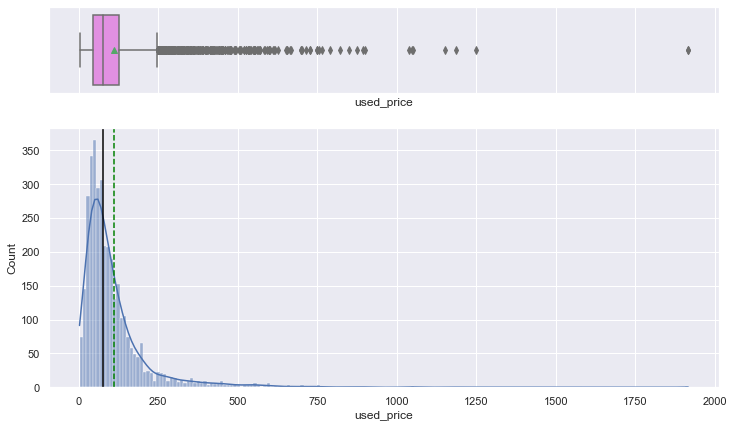

<IPython.core.display.Javascript object>

In [221]:
histogram_boxplot(data, "used_price")

In [222]:
data["used_price"].describe()

count    3571.000000
mean      109.880277
std       121.501226
min         2.510000
25%        45.205000
50%        75.530000
75%       126.000000
max      1916.540000
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

- The distribution of used phone prices is 'right-skewed' indicating that some used phone prices are somewhat high.
- The average used phone price is about 110 euros.

### What percentage of the used phone market is dominated by Android devices?

<AxesSubplot:xlabel='os', ylabel='count'>

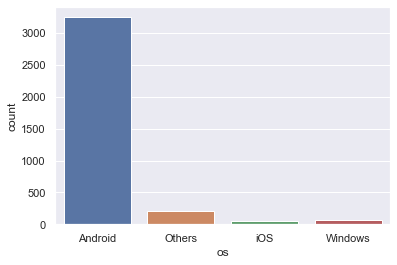

<IPython.core.display.Javascript object>

In [223]:
sns.countplot(data=data, x="os")

In [224]:
(len(data[data["os"] == "Android"]) / len(data["os"])) * 100

90.89890786894428

<IPython.core.display.Javascript object>

- Android devices significantly dominate the *used phone market*
    - It accounts for about **91%** of the entire market.

### The amount of RAM is important for the smooth functioning of a phone. 
### How does the amount of RAM vary with the brand?

In [225]:
df_ram = pd.DataFrame(
    data.groupby(["brand_name"], as_index=False)["ram"]
    .mean()
    .sort_values(by="ram", ascending=False)
)
df_ram.reset_index(drop=True)

,brand_name,ram
0,OnePlus,6.363636
1,Oppo,4.961240
2,Vivo,4.756410
3,Huawei,4.641326
4,Honor,4.593220
5,Xiaomi,4.567164
6,Google,4.533333
7,Meizu,4.451613
8,Realme,4.195122
9,Samsung,4.159341


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='brand_name', ylabel='ram'>

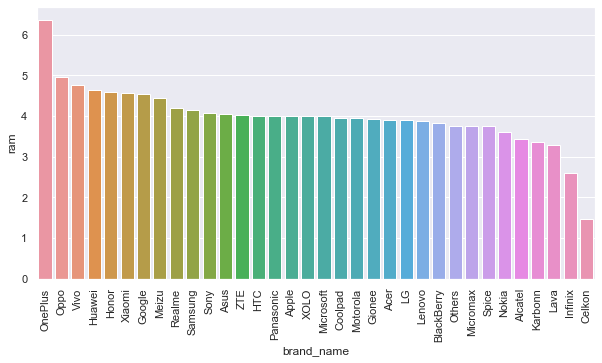

<IPython.core.display.Javascript object>

In [226]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(data=df_ram, x="brand_name", y="ram")

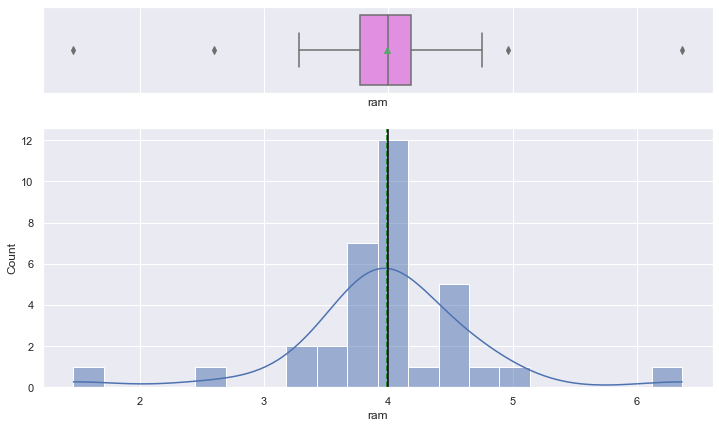

<IPython.core.display.Javascript object>

In [227]:
histogram_boxplot(df_ram, "ram")

In [318]:
df_ram.describe()

,ram
count,34.000000
mean,3.991285
std,0.754070
min,1.466216
25%,3.770667
50%,4.000000
75%,4.186177
max,6.363636


<IPython.core.display.Javascript object>

- The amount of RAM in association with the brand seems to be normally distributed.
- It is normally distributed within the range of about 3 to 5GB. 
- The average amount of RAM is about 4GB.
- There seem to be some outliers below and above the normally distributed range.
    - OnePlus and Oppo above.
    - Infinix and Celkon below.

### A large battery often increases a phone's weight, making it feel uncomfortable in the hands. 
### How does the weight vary for phones offering large batteries (more than 4500 mAh)?

In [229]:
df_battery_4500 = pd.DataFrame(data[data["battery"] > 4500])
df_battery_4500

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.9300,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.8700,103.80
11,Honor,Android,15.72,yes,no,13.0,8.0,64.0,4.0,5000.0,185.0,2020,344,117.9400,74.60
20,Honor,Android,25.56,yes,no,5.0,2.0,32.0,3.0,5100.0,173.0,2019,266,248.9000,167.63
21,Honor,Android,20.32,yes,no,8.0,8.0,32.0,3.0,5100.0,173.0,2019,321,201.1400,131.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,Samsung,Android,16.67,yes,yes,8.0,13.0,128.0,12.0,5000.0,222.0,2020,197,890.8000,667.92
3537,Samsung,Android,16.67,yes,no,8.0,13.0,128.0,12.0,5000.0,220.0,2020,176,1054.4505,789.54
3550,Samsung,Android,15.88,yes,no,12.0,16.0,64.0,4.0,6000.0,188.0,2019,455,165.6650,82.79
3565,Asus,Android,24.61,yes,no,NaN,24.0,128.0,8.0,6000.0,240.0,2019,325,1163.6500,756.99


<IPython.core.display.Javascript object>

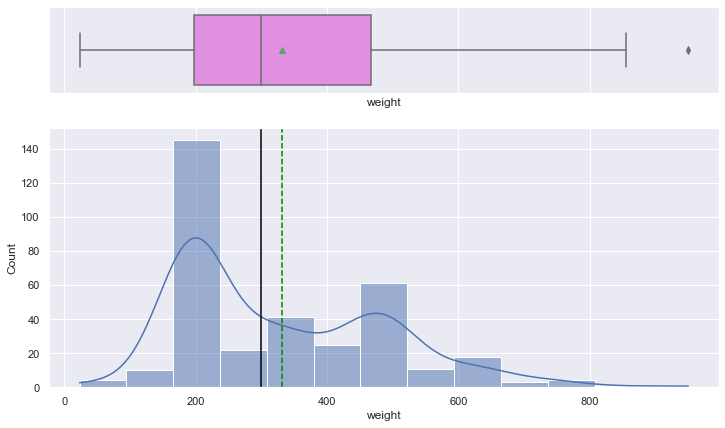

<IPython.core.display.Javascript object>

In [230]:
histogram_boxplot(df_battery_4500, "weight")

In [231]:
df_battery_4500["weight"].describe()

count    346.000000
mean     330.718786
std      160.952677
min       23.000000
25%      198.000000
50%      299.000000
75%      467.000000
max      950.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

- The weight for phones offering large batteries seems to follow a bimodal and right-skewed distribution.
- The first and most densely populated peak comes in at about 198 grams, and the second peak at about 467 grams. 
- Mean phone weight is about 331 grams whereas median phone weight is about 299 grams.
- The standard deviation is about 161 grams.

### Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. 
### How many phones are available across different brands with a screen size larger than 6 inches?

6 inches = 15.24 cm

In [232]:
df_screen_size_6 = pd.DataFrame(
    data[data["screen_size"] > 15.24]
    .groupby(["brand_name"], as_index=False)["screen_size"]
    .count()
    .sort_values(by="screen_size", ascending=False)
)
df_screen_size_6.columns = ["brand_name", "count"]
df_screen_size_6.reset_index(drop=True)

,brand_name,count
0,Huawei,159
1,Samsung,128
2,Others,116
3,Honor,87
4,Vivo,86
5,Xiaomi,85
6,Lenovo,72
7,Oppo,70
8,LG,68
9,Asus,44


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='brand_name', ylabel='count'>

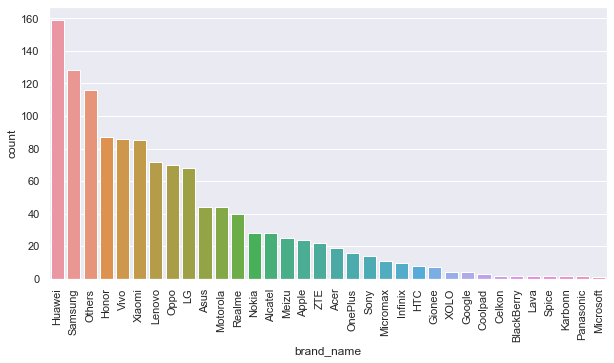

<IPython.core.display.Javascript object>

In [233]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(data=df_screen_size_6, x="brand_name", y="count")

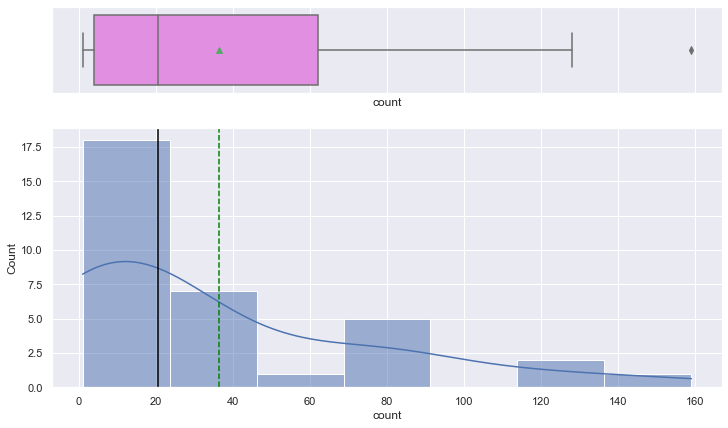

<IPython.core.display.Javascript object>

In [234]:
histogram_boxplot(df_screen_size_6, "count")

In [235]:
df_screen_size_6.describe().T

,count,mean,std,min,25%,50%,75%,max
count,34.0,36.323529,41.595979,1.0,4.0,20.5,62.0,159.0


<IPython.core.display.Javascript object>

- The number of phones available across different brands with a screen size larger than 6 inches follows a right-skewed distribution.
- The top brand offering the most phones with a screen size larger than 6 inches is Huawei with 159 phones.
- Mean number of phones available across different brands with a screen size larger than 6 inches is about 36 phones per brand. 
- The standard deviation is about 42 phones. 

### Budget phones nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. 
### What is the distribution of budget phones offering greater than 8MP selfie cameras across brands?

In [236]:
df_selfie_camera_mp_8 = pd.DataFrame(
    data[data["selfie_camera_mp"] > 8]
    .groupby(["brand_name"], as_index=False)["selfie_camera_mp"]
    .count()
    .sort_values(by="selfie_camera_mp", ascending=False)
)
df_selfie_camera_mp_8.columns = ["brand_name", "count"]
df_selfie_camera_mp_8.reset_index(drop=True)

,brand_name,count
0,Huawei,91
1,Vivo,78
2,Oppo,75
3,Xiaomi,65
4,Samsung,60
5,Honor,43
6,Others,34
7,LG,32
8,Motorola,26
9,Meizu,24


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='brand_name', ylabel='count'>

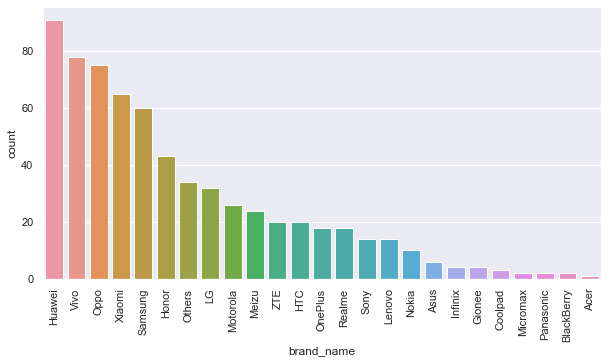

<IPython.core.display.Javascript object>

In [237]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.barplot(data=df_selfie_camera_mp_8, x="brand_name", y="count")

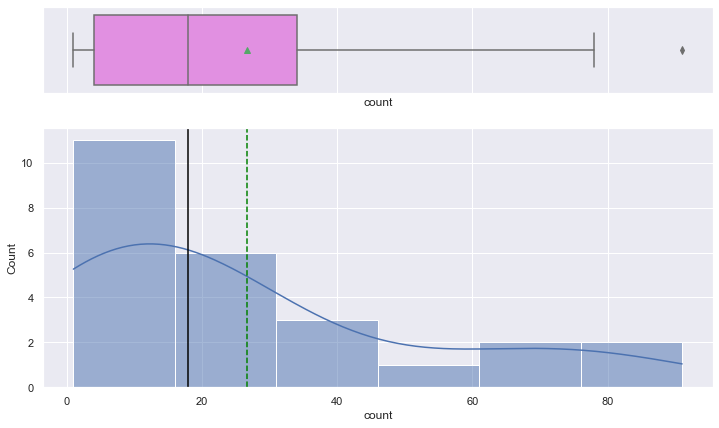

<IPython.core.display.Javascript object>

In [238]:
histogram_boxplot(df_selfie_camera_mp_8, "count")

In [239]:
df_selfie_camera_mp_8.describe().T

,count,mean,std,min,25%,50%,75%,max
count,25.0,26.64,26.913256,1.0,4.0,18.0,34.0,91.0


<IPython.core.display.Javascript object>

- The number of phones available across different brands with a selfie camera greater than 8mp follows a right-skewed distribution. This means that some brands do offer a substantial number of phones with a selfie camera greater than 8mp.
- The top brand offering the most phones with a selfie camera greater than 8mp is Huawei with 91 phones.
- Mean number of phones available across different brands with a selfie camera greater than 8mp is about 27 phones per brand. 
- Median number of phones available across different brands with a selfie camera greater than 8mp is about 18 phones per brand. 

### Which attributes are highly correlated with the used phone price?

In [240]:
data.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
screen_size,1.000000,0.189274,0.370251,0.143750,0.283320,0.741848,0.634869,0.454596,-0.397210,0.342092,0.385928
main_camera_mp,0.189274,1.000000,0.423704,0.004032,0.206895,0.239659,-0.073371,0.354243,-0.142915,0.360324,0.281065
selfie_camera_mp,0.370251,0.423704,1.000000,0.283188,0.445200,0.344864,-0.005384,0.696703,-0.556027,0.399368,0.497530
int_memory,0.143750,0.004032,0.283188,1.000000,0.079572,0.113488,0.017879,0.219256,-0.228636,0.343227,0.404913
ram,0.283320,0.206895,0.445200,0.079572,1.000000,0.234465,0.069766,0.311379,-0.286884,0.443403,0.522659
battery,0.741848,0.239659,0.344864,0.113488,0.234465,1.000000,0.704468,0.457467,-0.351055,0.341864,0.363767
weight,0.634869,-0.073371,-0.005384,0.017879,0.069766,0.704468,1.000000,0.062348,-0.059272,0.197986,0.170654
release_year,0.454596,0.354243,0.696703,0.219256,0.311379,0.457467,0.062348,1.000000,-0.748594,0.296972,0.456764
days_used,-0.397210,-0.142915,-0.556027,-0.228636,-0.286884,-0.351055,-0.059272,-0.748594,1.000000,-0.235613,-0.470760
new_price,0.342092,0.360324,0.399368,0.343227,0.443403,0.341864,0.197986,0.296972,-0.235613,1.000000,0.926087


<IPython.core.display.Javascript object>

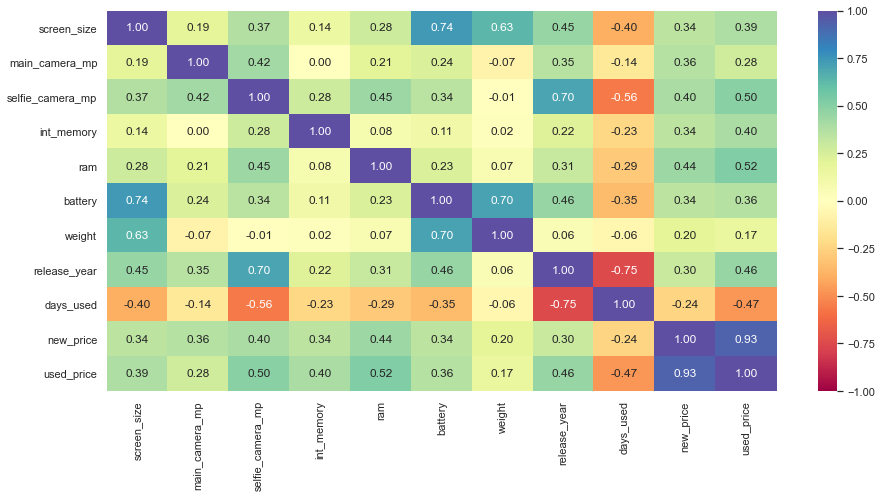

<IPython.core.display.Javascript object>

In [241]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.show()

- *Used_price* is highly negatively correlated with `days_used`, which means that as the number of days a phone is used increases, used price tends to decrease.


- *Used_price* is highly positively correlated with `new_price`,`ram`, and `selfie_camera_mp`, which means that as the new price of a phone, ram storage, and selfie camera megapixels increase, used price tends to increase.


- Top positively correlated attributes:
    1. `new_price` = 0.93
    2. `ram` = 0.52
    3. `selfie_camera_mp` = 0.50 


- The only negatively correlated attribute is `days_used` with a strong correlation of -0.47.

## Univariate Analysis

### Data Dictionary

- `brand_name`: Name of manufacturing brand
- `os`: OS on which the phone runs
- `screen_size`: Size of the screen in cm
- `4g`: Whether 4G is available or not
- `5g`: Whether 5G is available or not
- `main_camera_mp`: Resolution of the rear camera in megapixels
- `selfie_camera_mp`: Resolution of the front camera in megapixels
- `int_memory`: Amount of internal memory (ROM) in GB
- `ram`: Amount of RAM in GB
- `battery`: Energy capacity of the phone battery in mAh
- `weight`: Weight of the phone in grams
- `release_year`: Year when the phone model was released
- `days_used`: Number of days the used/refurbished phone has been used
- `new_price`: Price of a new phone of the same model in euros
- `used_price`: Price of the used/refurbished phone in euros

<AxesSubplot:xlabel='brand_name', ylabel='count'>

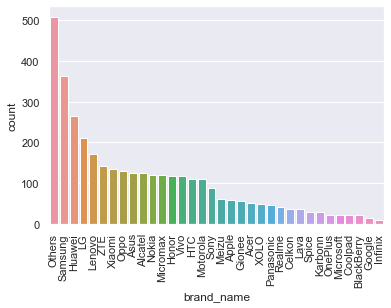

<IPython.core.display.Javascript object>

In [242]:
plt.xticks(rotation=90)
sns.countplot(data=data, x="brand_name", order=data["brand_name"].value_counts().index)

**Observations**
- The category *Others* is the highest among other brand names sold followed by:
    * Samsung, Huawei, LG, Lenovo, ...

<AxesSubplot:xlabel='os', ylabel='count'>

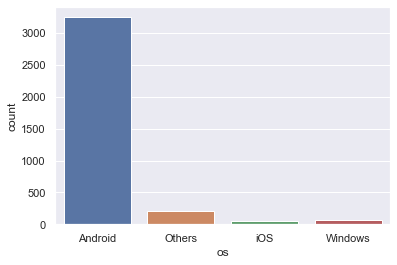

<IPython.core.display.Javascript object>

In [243]:
sns.countplot(data=data, x="os")

In [244]:
data["os"].value_counts()

Android    3246
Others      202
Windows      67
iOS          56
Name: os, dtype: int64

<IPython.core.display.Javascript object>

**Observations**
- ReCell's market is most populated by **Android OS** which accounts for ~91%
- Others = ~6%
- Windows = ~2%
- iOS = ~1%

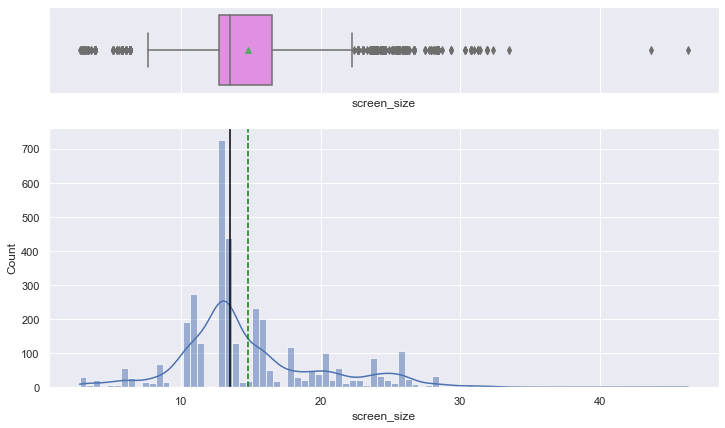

<IPython.core.display.Javascript object>

In [148]:
histogram_boxplot(data, "screen_size")

In [150]:
df["screen_size"].describe()

count    3571.000000
mean       14.521803
std         4.165771
min         6.985000
25%        12.700000
50%        13.490000
75%        16.510000
max        22.225000
Name: screen_size, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Screen size distribution appears right-skewed
- Mean: ~14.5 cm
- Numerous outliers are detected below and above the lower and upper whiskers

<AxesSubplot:xlabel='4g', ylabel='count'>

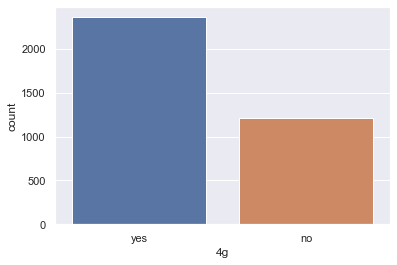

<IPython.core.display.Javascript object>

In [149]:
sns.countplot(data=data, x="4g")

In [150]:
data["4g"].describe()

count     3571
unique       2
top        yes
freq      2359
Name: 4g, dtype: object

<IPython.core.display.Javascript object>

**Observations**
- 66% of ReCell's market has 4g capability

<AxesSubplot:xlabel='5g', ylabel='count'>

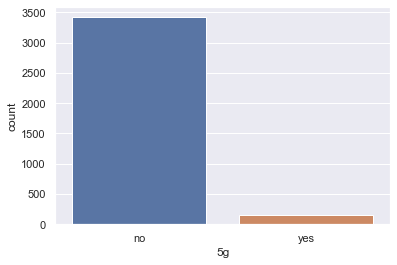

<IPython.core.display.Javascript object>

In [151]:
sns.countplot(data=data, x="5g")

In [152]:
data["5g"].describe()

count     3571
unique       2
top         no
freq      3419
Name: 5g, dtype: object

<IPython.core.display.Javascript object>

**Observations**
- Only 4% of ReCell's market has 5g capability

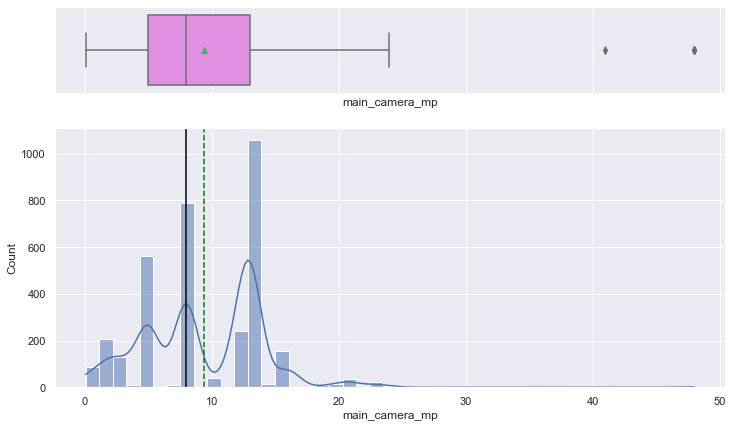

<IPython.core.display.Javascript object>

In [153]:
histogram_boxplot(data, "main_camera_mp")

In [154]:
data["main_camera_mp"].describe()

count    3391.000000
mean        9.400454
std         4.818396
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        48.000000
Name: main_camera_mp, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Main camera megapixels distribution appears to be right-skewed 
- Mean: ~9.4 mp
- There appears to be two outliers above the upper whisker

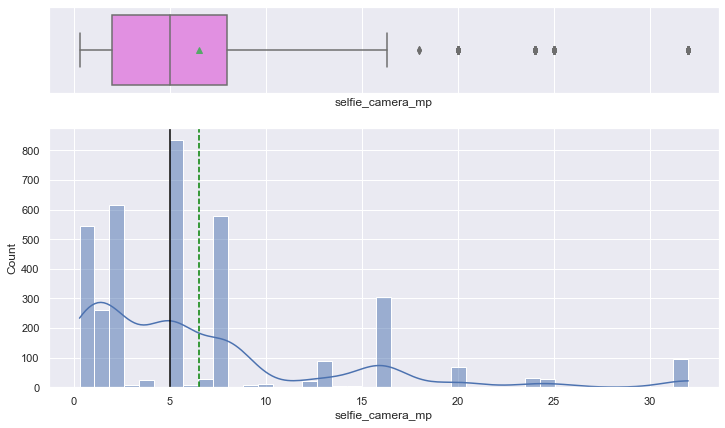

<IPython.core.display.Javascript object>

In [155]:
histogram_boxplot(data, "selfie_camera_mp")

In [156]:
data["selfie_camera_mp"].describe()

count    3569.000000
mean        6.547352
std         6.879359
min         0.300000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Selfie camera megapixels distribution is right-skewed 
- Mean: ~6.5 mp
- There appears to be five outliers above the upper whisker

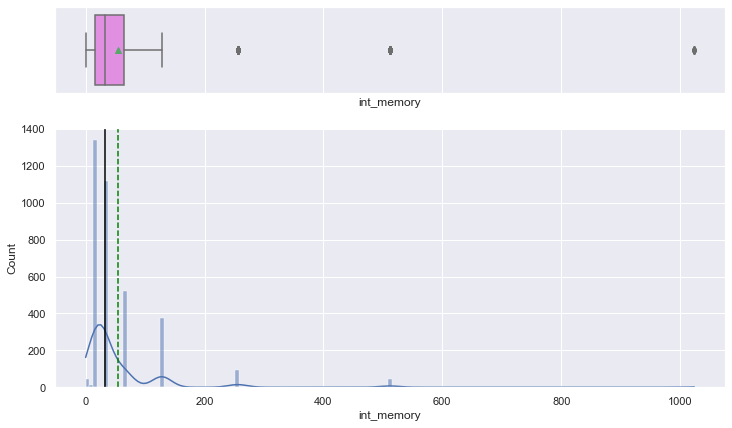

<IPython.core.display.Javascript object>

In [157]:
histogram_boxplot(data, "int_memory")

In [158]:
data["int_memory"].describe()

count    3561.000000
mean       54.532607
std        84.696246
min         0.005000
25%        16.000000
50%        32.000000
75%        64.000000
max      1024.000000
Name: int_memory, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Internal memory distribution is heavily right-skewed 
- Mean: ~54.5 mp
- There appears to be three outliers above the upper whisker

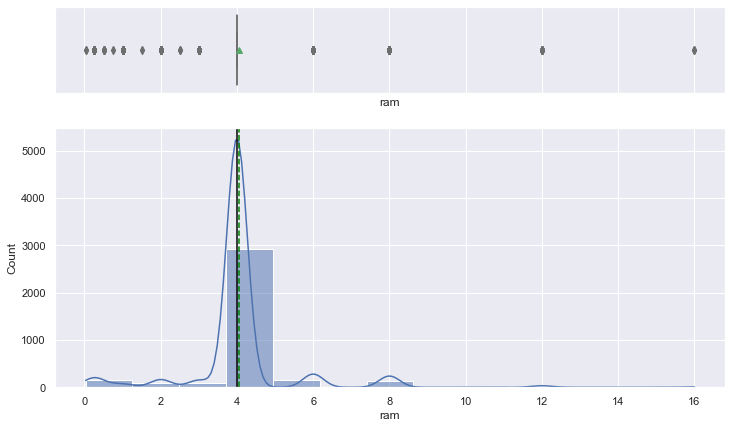

<IPython.core.display.Javascript object>

In [159]:
histogram_boxplot(data, "ram")

In [160]:
data["ram"].describe()

count    3561.000000
mean        4.056962
std         1.391844
min         0.030000
25%         4.000000
50%         4.000000
75%         4.000000
max        16.000000
Name: ram, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Ram seems to be normally distributed with both the median and mean centered along the peak
- Mean: ~4 GB
- There are several outliers both below and above the whiskers

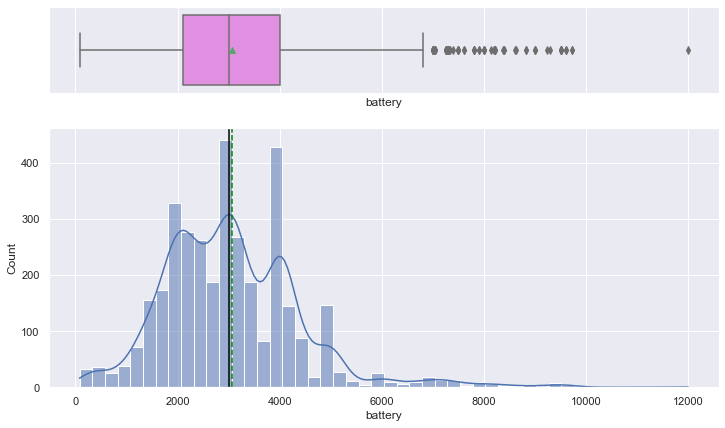

<IPython.core.display.Javascript object>

In [161]:
histogram_boxplot(data, "battery")

In [162]:
data["battery"].describe()

count     3565.000000
mean      3067.225666
std       1364.206665
min         80.000000
25%       2100.000000
50%       3000.000000
75%       4000.000000
max      12000.000000
Name: battery, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Battery distribution is somewhat right-skewed
- Mean: ~3067 mAh
- There are several outliers above the upper whisker

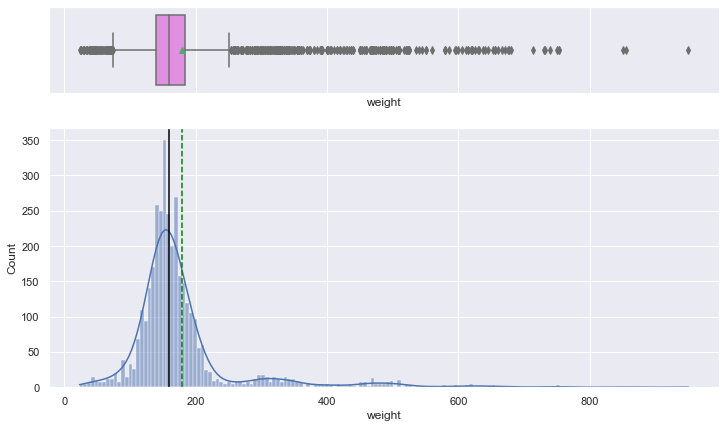

<IPython.core.display.Javascript object>

In [163]:
histogram_boxplot(data, "weight")

In [164]:
data["weight"].describe()

count    3564.000000
mean      179.424285
std        90.280856
min        23.000000
25%       140.000000
50%       159.000000
75%       184.000000
max       950.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Weight follows a right-skewed distribution
- Mean: 179 grams
- Numerous outliers detected both below and above the lower and upper whiskers

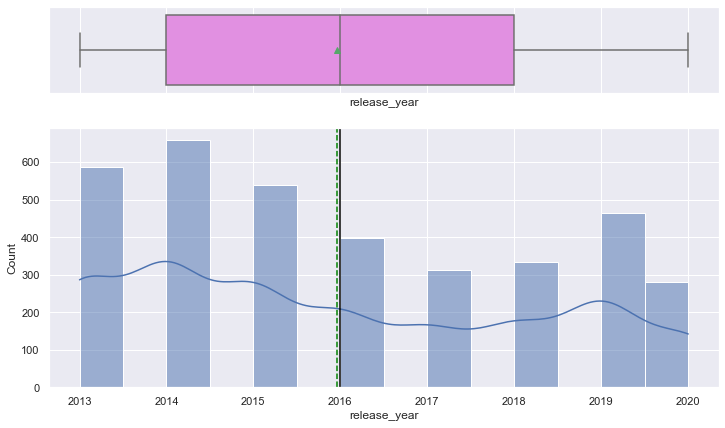

<IPython.core.display.Javascript object>

In [165]:
histogram_boxplot(data, "release_year")

In [166]:
data["release_year"].describe()

count    3571.000000
mean     2015.964996
std         2.291784
min      2013.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: release_year, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Release year is slighly right-skewed with more newer phones coming to the used phone market
- Mean: ~2016 release year
- No outliers detected

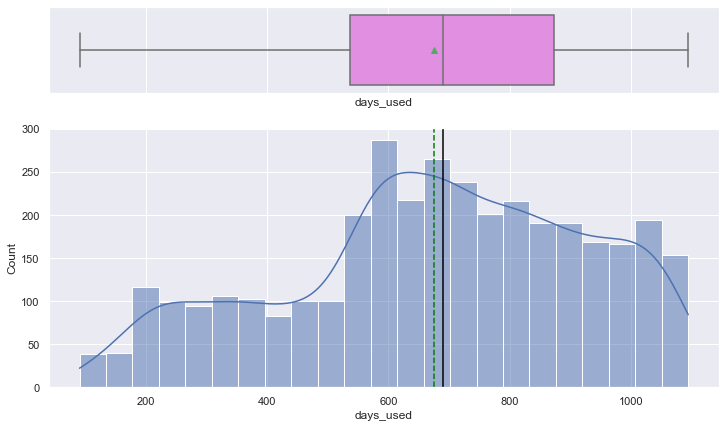

<IPython.core.display.Javascript object>

In [167]:
histogram_boxplot(data, "days_used")

In [168]:
data["days_used"].describe()

count    3571.000000
mean      675.391487
std       248.640972
min        91.000000
25%       536.000000
50%       690.000000
75%       872.000000
max      1094.000000
Name: days_used, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Days used distribution is left-skewed indicating a higher population of phones with more used days on them
- Mean: ~675 days 
- No outliers detected

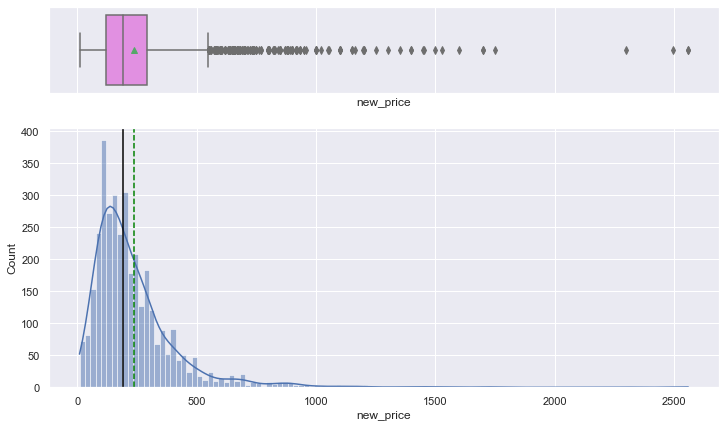

<IPython.core.display.Javascript object>

In [169]:
histogram_boxplot(data, "new_price")

In [170]:
data["new_price"].describe()

count    3571.000000
mean      237.389037
std       197.545581
min         9.130000
25%       120.130000
50%       189.800000
75%       291.935000
max      2560.200000
Name: new_price, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- The new price distribution is right-skewed indicating some used phones had a higher price when initially bought
- Mean: ~237 euros
- Numerous outliers detected above the upper whisker

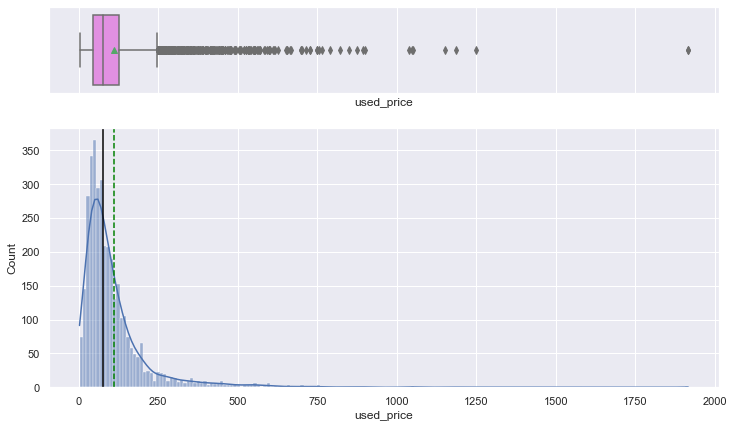

<IPython.core.display.Javascript object>

In [174]:
histogram_boxplot(data, "used_price")

In [175]:
data["used_price"].describe()

count    3571.000000
mean      109.880277
std       121.501226
min         2.510000
25%        45.205000
50%        75.530000
75%       126.000000
max      1916.540000
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Used price seems to follow a strong right-skewed distribution which could indicate that some used phones are resold at a higher price than average
- Mean: ~110 euros
- Numerous outliers detected above the upper whisker

## Bivariate Analysis

In [176]:
data.corr()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
screen_size,1.000000,0.189274,0.370251,0.143750,0.283320,0.741848,0.634869,0.454596,-0.397210,0.342092,0.385928
main_camera_mp,0.189274,1.000000,0.423704,0.004032,0.206895,0.239659,-0.073371,0.354243,-0.142915,0.360324,0.281065
selfie_camera_mp,0.370251,0.423704,1.000000,0.283188,0.445200,0.344864,-0.005384,0.696703,-0.556027,0.399368,0.497530
int_memory,0.143750,0.004032,0.283188,1.000000,0.079572,0.113488,0.017879,0.219256,-0.228636,0.343227,0.404913
ram,0.283320,0.206895,0.445200,0.079572,1.000000,0.234465,0.069766,0.311379,-0.286884,0.443403,0.522659
battery,0.741848,0.239659,0.344864,0.113488,0.234465,1.000000,0.704468,0.457467,-0.351055,0.341864,0.363767
weight,0.634869,-0.073371,-0.005384,0.017879,0.069766,0.704468,1.000000,0.062348,-0.059272,0.197986,0.170654
release_year,0.454596,0.354243,0.696703,0.219256,0.311379,0.457467,0.062348,1.000000,-0.748594,0.296972,0.456764
days_used,-0.397210,-0.142915,-0.556027,-0.228636,-0.286884,-0.351055,-0.059272,-0.748594,1.000000,-0.235613,-0.470760
new_price,0.342092,0.360324,0.399368,0.343227,0.443403,0.341864,0.197986,0.296972,-0.235613,1.000000,0.926087


<IPython.core.display.Javascript object>

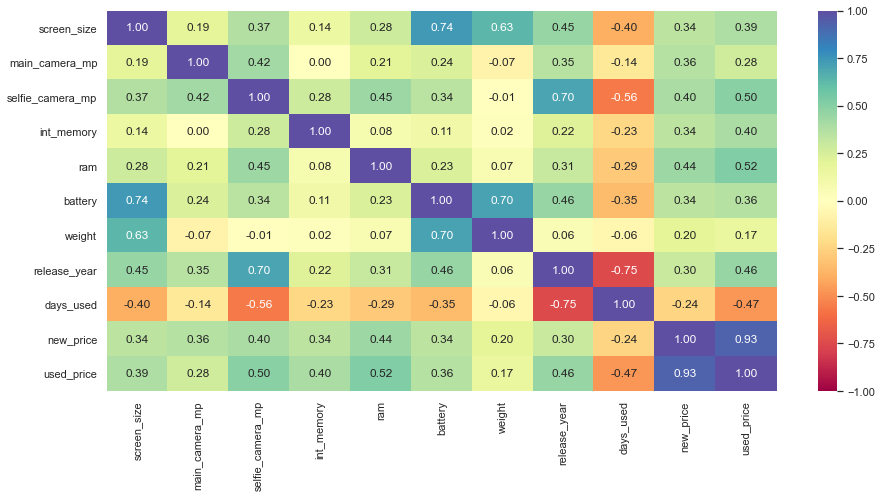

<IPython.core.display.Javascript object>

In [177]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.show()

- Top positively correlated attributes:
    1. `new_price` = 0.93
    2. `ram` = 0.52
    3. `selfie_camera_mp` = 0.50 


- The only negatively correlated attribute is `days_used` with a strong correlation of -0.47.

***Used_price* vs *days_used***

<AxesSubplot:xlabel='days_used', ylabel='used_price'>

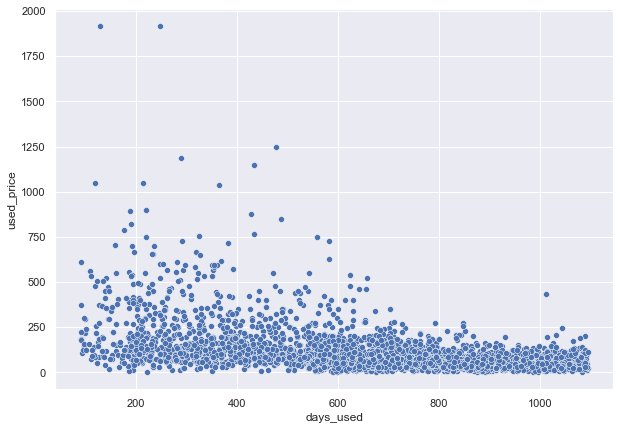

<IPython.core.display.Javascript object>

In [247]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x="days_used", y="used_price")

**Observations**
- A negative trend is apparent in this scatterplot and confirmed by the correlation heatmap.
- Varation is greater the less number of days a phone is used.
- Variation decreases the more days a phone is used.
- In general most used phones are sold at a little under ~250 euros.

***Used_price* vs *new_price***

<AxesSubplot:xlabel='new_price', ylabel='used_price'>

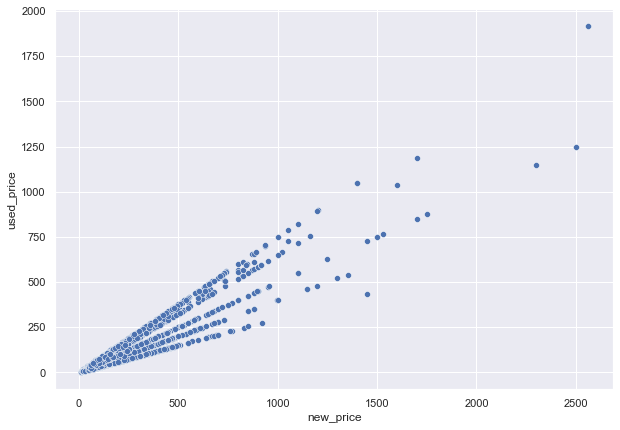

<IPython.core.display.Javascript object>

In [248]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x="new_price", y="used_price")

**Observations**
- The higher new price is, used price increases. A strong positive linear relationship is apparent.
- Varation does increase as new price increases.

***Used_price* vs *ram***

<AxesSubplot:xlabel='ram', ylabel='used_price'>

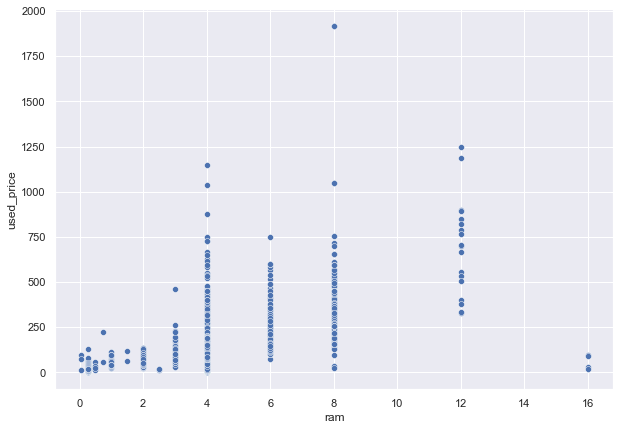

<IPython.core.display.Javascript object>

In [256]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x="ram", y="used_price")

**Observations**
- Ram is a categorical variable, however the scatterplot does indicate that as ram increases do does used price.
- Used phones with a ram size of about 4-8 GB are more common.

***Used_price* vs *selfie_camera_mp***

<AxesSubplot:xlabel='selfie_camera_mp', ylabel='used_price'>

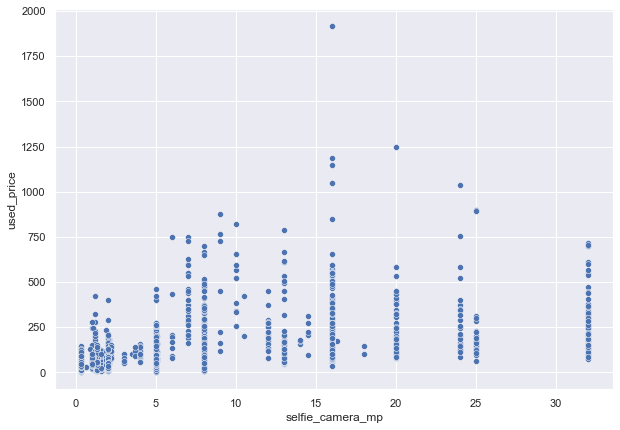

<IPython.core.display.Javascript object>

In [255]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=data, x="selfie_camera_mp", y="used_price")

**Observations**
- As selfie camera megapixels increase, the used price also increases.
- Variation seems to increase as selfie camera megapixels increase.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [84]:
# Create a copy of the data to avoid any changes to original data
df = data.copy()

<IPython.core.display.Javascript object>

In [6]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'new_price', 'used_price'],
      dtype='object')

<IPython.core.display.Javascript object>

- Column names do not have any spaces or special characters other than the underscore, so they do not need to be changed.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand_name        3571 non-null   object 
 1   os                3571 non-null   object 
 2   screen_size       3571 non-null   float64
 3   4g                3571 non-null   object 
 4   5g                3571 non-null   object 
 5   main_camera_mp    3391 non-null   float64
 6   selfie_camera_mp  3569 non-null   float64
 7   int_memory        3561 non-null   float64
 8   ram               3561 non-null   float64
 9   battery           3565 non-null   float64
 10  weight            3564 non-null   float64
 11  release_year      3571 non-null   int64  
 12  days_used         3571 non-null   int64  
 13  new_price         3571 non-null   float64
 14  used_price        3571 non-null   float64
dtypes: float64(9), int64(2), object(4)
memory usage: 418.6+ KB


<IPython.core.display.Javascript object>

**Converting object data type features to categorical data tpes.**

In [85]:
df["brand_name"] = df["brand_name"].astype("category")
df["os"] = df["os"].astype("category")
df["4g"] = df["4g"].astype("category")
df["5g"] = df["5g"].astype("category")

<IPython.core.display.Javascript object>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   brand_name        3571 non-null   category
 1   os                3571 non-null   category
 2   screen_size       3571 non-null   float64 
 3   4g                3571 non-null   category
 4   5g                3571 non-null   category
 5   main_camera_mp    3391 non-null   float64 
 6   selfie_camera_mp  3569 non-null   float64 
 7   int_memory        3561 non-null   float64 
 8   ram               3561 non-null   float64 
 9   battery           3565 non-null   float64 
 10  weight            3564 non-null   float64 
 11  release_year      3571 non-null   int64   
 12  days_used         3571 non-null   int64   
 13  new_price         3571 non-null   float64 
 14  used_price        3571 non-null   float64 
dtypes: category(4), float64(9), int64(2)
memory usage: 322.7 KB


<IPython.core.display.Javascript object>

- All the previous object dtypes features are now categorical.

### Missing value treatment

In [10]:
df.isnull().sum().sort_values(ascending=False)

main_camera_mp      180
int_memory           10
ram                  10
weight                7
battery               6
selfie_camera_mp      2
brand_name            0
os                    0
screen_size           0
4g                    0
5g                    0
release_year          0
days_used             0
new_price             0
used_price            0
dtype: int64

<IPython.core.display.Javascript object>

- A total of 6 features have missing values, they include:
    1. `main_camera_mp` with 180 missing values
    2. `int_memory` with 10 missing values
    3. `ram` with 10 missing values
    4. `weight` with 7 missing values
    5. `battery` with 6 missing values
    6. `selfie_camera_mp` with 2 missing values

**Fixing the missing values.**

- For the predictor variables, we will replace the missing values in each column with its median.

In [86]:
medianFiller = lambda x: x.fillna(x.median())
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
df[numeric_columns] = df[numeric_columns].apply(medianFiller, axis=0)

<IPython.core.display.Javascript object>

In [87]:
df

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price,used_price
0,Honor,Android,23.97,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,111.6200,86.96
1,Honor,Android,28.10,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,249.3900,161.49
2,Honor,Android,24.29,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,359.4700,268.55
3,Honor,Android,26.04,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,278.9300,180.23
4,Honor,Android,15.72,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,140.8700,103.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,Asus,Android,15.88,yes,no,8.0,8.0,64.0,6.0,5000.0,190.0,2019,232,654.5000,490.96
3567,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,518.8145,259.30
3568,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,92.6500,69.81
3569,Alcatel,Android,18.73,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,101.9150,76.07


<IPython.core.display.Javascript object>

In [88]:
df.isnull().sum()

brand_name          0
os                  0
screen_size         0
4g                  0
5g                  0
main_camera_mp      0
selfie_camera_mp    0
int_memory          0
ram                 0
battery             0
weight              0
release_year        0
days_used           0
new_price           0
used_price          0
dtype: int64

<IPython.core.display.Javascript object>

- All the missing values have been treated.

In [20]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571.0,NaN,NaN,NaN,9.329863,4.705341,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3571.0,NaN,NaN,NaN,6.546486,6.877529,0.3,2.0,5.0,8.0,32.0
int_memory,3571.0,NaN,NaN,NaN,54.469509,84.585924,0.005,16.0,32.0,64.0,1024.0
ram,3571.0,NaN,NaN,NaN,4.056802,1.389897,0.03,4.0,4.0,4.0,16.0
battery,3571.0,NaN,NaN,NaN,3067.112714,1363.062572,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

**Observations**

- The *brand_name* column has 34 unique values, i.e., the data is collected from 34 different brands.
- The *os* column has 4 unique values - "Android", "Others", "iOS", "Windows"
- The *4g* column has 2 unique values - "yes" and "no"
- The *5g* column has 2 unique values - "yes" and "no"
- *release year* ranges from 2013 to 2020.
- Average *Used price* is about 110 euros.

### Outlier detection and treatment

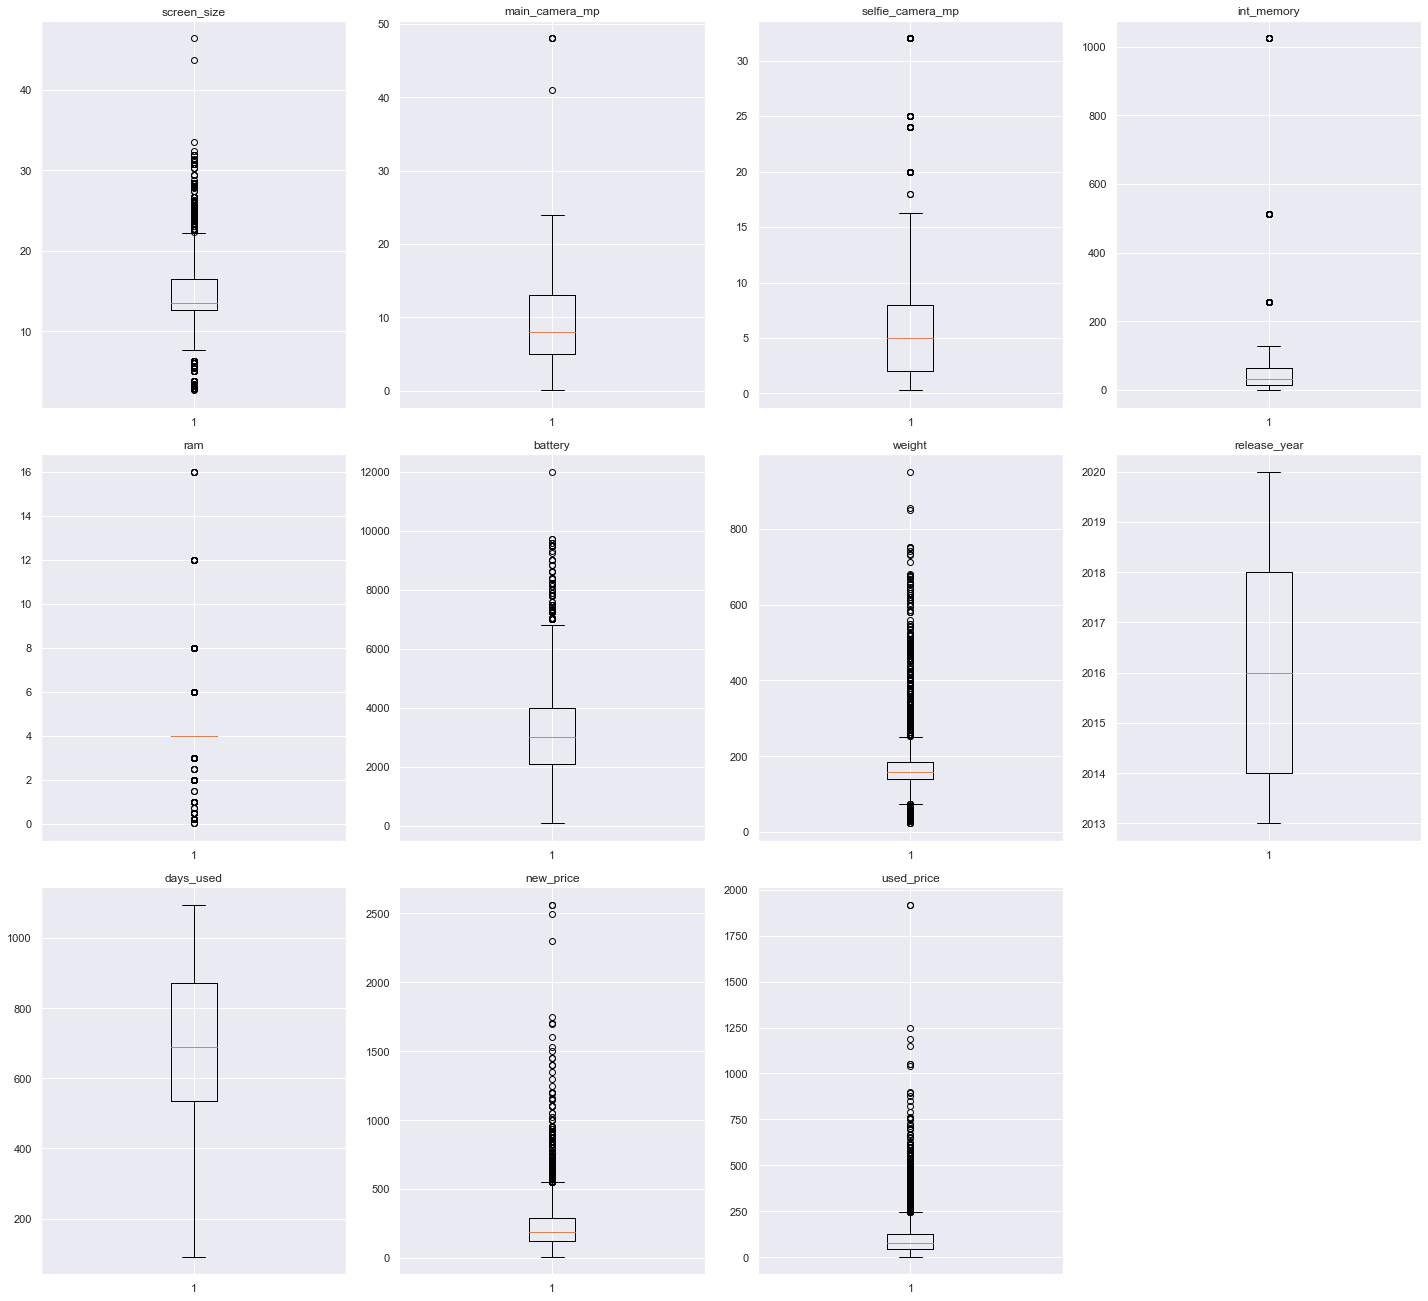

<IPython.core.display.Javascript object>

In [14]:
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

* There are upper outliers in *main_camera_mp*, *selfie_camera_mp*, *int_memory*, *battery*, *new_price* and *used_price*.

* There are no outliers in *release_year* and *days_used*.

* *screen_size* and *weight* have both upper and lowers outliers.

* We will treat these outliers as these might adversely affect the predictive power of linear model. However, in real life, these outliers may be due to non-linear pattern in the data or can be important information.

* Sometimes outliers in the independent variable can adversely impact the linear model. This can be checked by building the model with and without outliers and comparing the model performances.

### Outlier Treatment

- Let's treat outliers in the data by flooring and capping.

In [22]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical variables
    col_list: list of numerical variables
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [103]:
# # treating the outliers
# numerical_col = df.select_dtypes(include=np.number).columns.tolist()
# df = treat_outliers_all(df, numerical_col)

<IPython.core.display.Javascript object>

In [129]:
# treating the outliers
numerical_col = ["screen_size", "weight", "used_price", "new_price"]
df = treat_outliers_all(df, numerical_col)

<IPython.core.display.Javascript object>

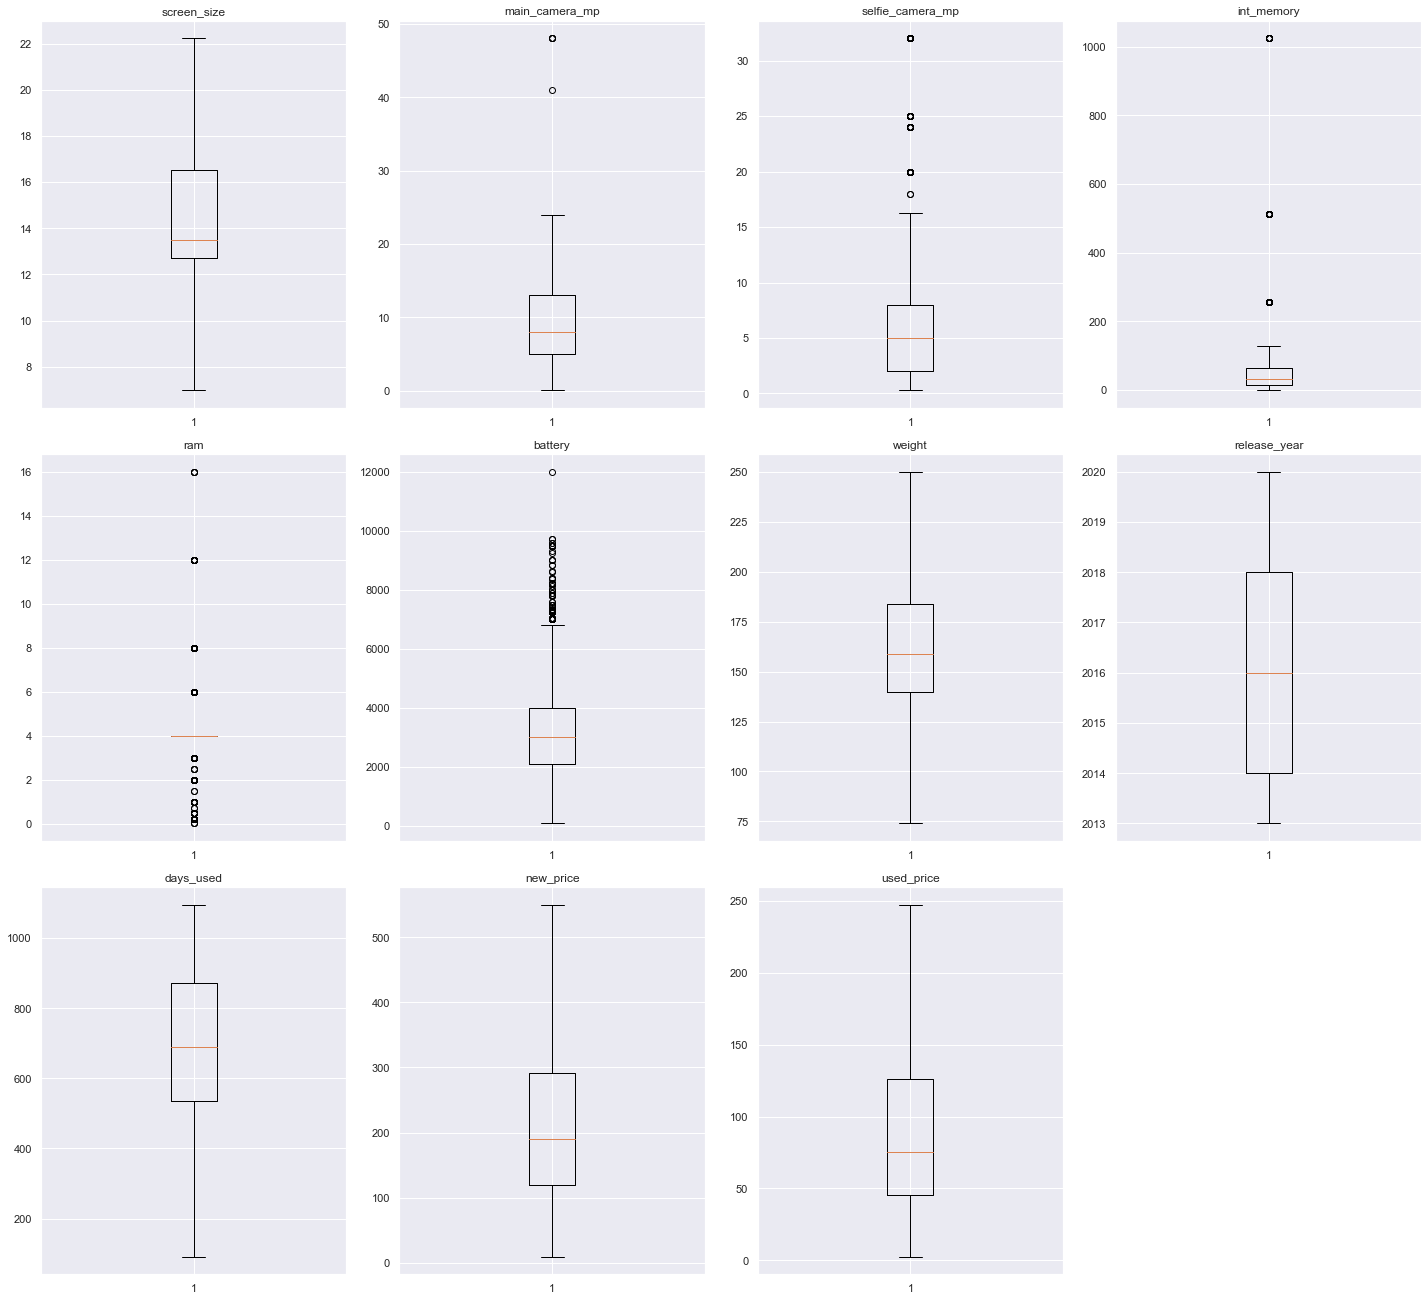

<IPython.core.display.Javascript object>

In [130]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All outliers have been treated.

## EDA (contd.)

- It is a good idea to explore the data once again after manipulating it.

### Data Dictionary

- `brand_name`: Name of manufacturing brand
- `os`: OS on which the phone runs
- `screen_size`: Size of the screen in cm
- `4g`: Whether 4G is available or not
- `5g`: Whether 5G is available or not
- `main_camera_mp`: Resolution of the rear camera in megapixels
- `selfie_camera_mp`: Resolution of the front camera in megapixels
- `int_memory`: Amount of internal memory (ROM) in GB
- `ram`: Amount of RAM in GB
- `battery`: Energy capacity of the phone battery in mAh
- `weight`: Weight of the phone in grams
- `release_year`: Year when the phone model was released
- `days_used`: Number of days the used/refurbished phone has been used
- `new_price`: Price of a new phone of the same model in euros
- `used_price`: Price of the used/refurbished phone in euros

<AxesSubplot:xlabel='brand_name', ylabel='count'>

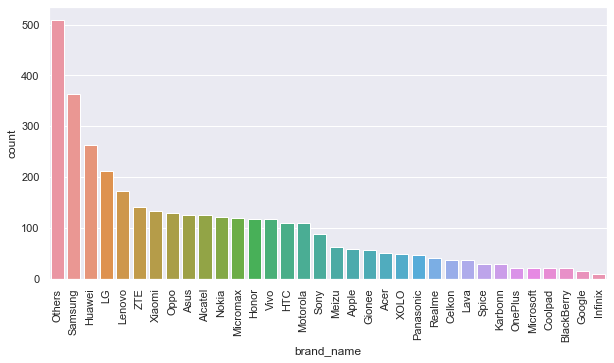

<IPython.core.display.Javascript object>

In [312]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
sns.countplot(data=df, x="brand_name", order=data["brand_name"].value_counts().index)

**Observations**
- The category *Others* is the highest among other brand names sold followed by:
    * Samsung, Huawei, LG, Lenovo, ...

<AxesSubplot:xlabel='os', ylabel='count'>

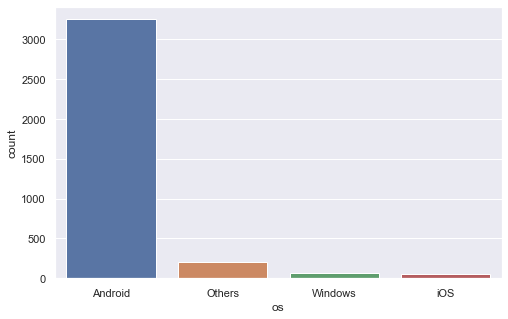

<IPython.core.display.Javascript object>

In [314]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="os")

In [181]:
df["os"].value_counts()

Android    3246
Others      202
Windows      67
iOS          56
Name: os, dtype: int64

<IPython.core.display.Javascript object>

**Observations**
- ReCell's market is most populated by **Android OS** which accounts for ~91%
- Others = ~6%
- Windows = ~2%
- iOS = ~1%

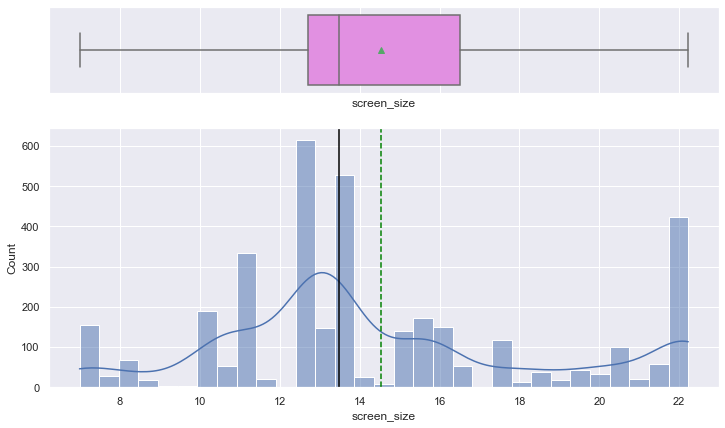

<IPython.core.display.Javascript object>

In [182]:
histogram_boxplot(df, "screen_size")

In [150]:
df["screen_size"].describe()

count    3571.000000
mean       14.521803
std         4.165771
min         6.985000
25%        12.700000
50%        13.490000
75%        16.510000
max        22.225000
Name: screen_size, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Screen size distribution appears right-skewed with the mean (~14.5 cm) to the right of the peak

<AxesSubplot:xlabel='4g', ylabel='count'>

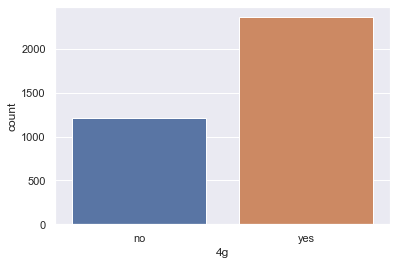

<IPython.core.display.Javascript object>

In [183]:
sns.countplot(data=df, x="4g")

In [184]:
df["4g"].describe()

count     3571
unique       2
top        yes
freq      2359
Name: 4g, dtype: object

<IPython.core.display.Javascript object>

**Observations**
- 66% of ReCell's market has 4g capability

<AxesSubplot:xlabel='5g', ylabel='count'>

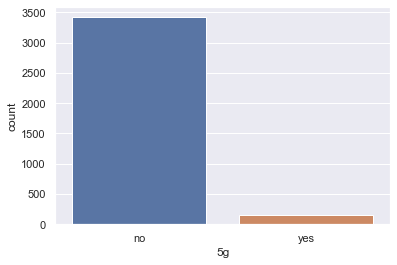

<IPython.core.display.Javascript object>

In [185]:
sns.countplot(data=df, x="5g")

In [186]:
df["5g"].describe()

count     3571
unique       2
top         no
freq      3419
Name: 5g, dtype: object

<IPython.core.display.Javascript object>

**Observations**
- Only 4% of ReCell's market has 5g capability

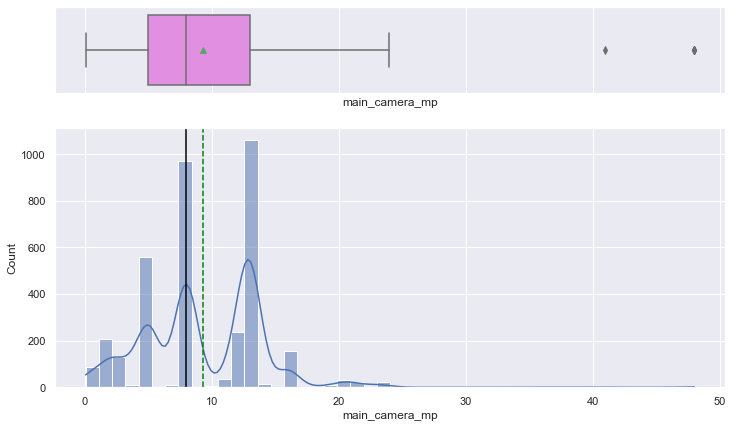

<IPython.core.display.Javascript object>

In [187]:
histogram_boxplot(df, "main_camera_mp")

In [188]:
df["main_camera_mp"].describe()

count    3571.000000
mean        9.329863
std         4.705341
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        48.000000
Name: main_camera_mp, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Main camera megapixels distribution is right-skewed 
- Mean: ~9.4 mp
- There appears to be two outliers above the upper whisker

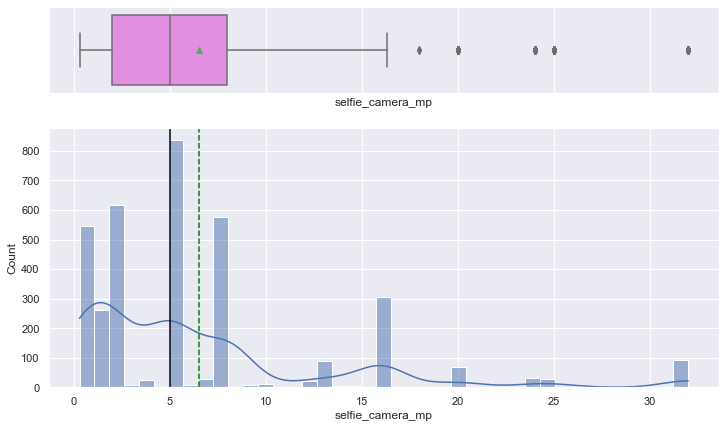

<IPython.core.display.Javascript object>

In [189]:
histogram_boxplot(df, "selfie_camera_mp")

In [190]:
df["selfie_camera_mp"].describe()

count    3571.000000
mean        6.546486
std         6.877529
min         0.300000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Selfie camera megapixels distribution is right-skewed 
- Mean: ~6.5 mp
- There appears to be five outliers above the upper whisker

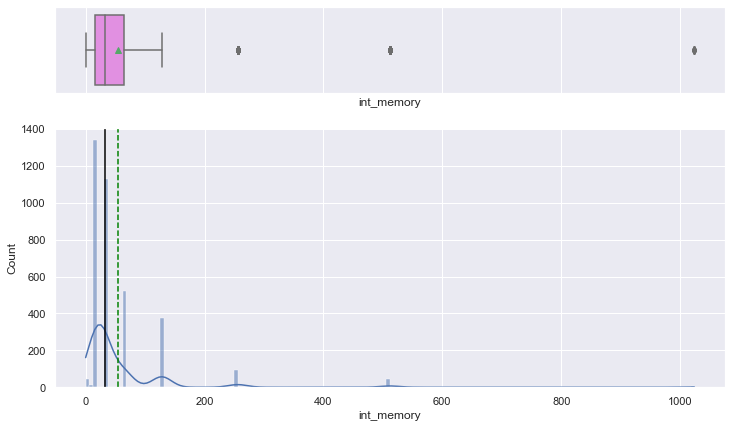

<IPython.core.display.Javascript object>

In [191]:
histogram_boxplot(df, "int_memory")

In [192]:
df["int_memory"].describe()

count    3571.000000
mean       54.469509
std        84.585924
min         0.005000
25%        16.000000
50%        32.000000
75%        64.000000
max      1024.000000
Name: int_memory, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Internal memory distribution is heavily right-skewed 
- Mean: ~54.5 mp
- There appears to be three outliers above the upper whisker

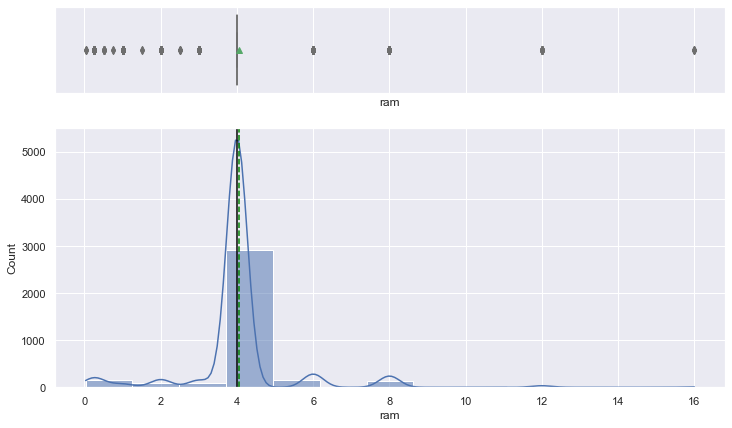

<IPython.core.display.Javascript object>

In [193]:
histogram_boxplot(df, "ram")

In [194]:
df["ram"].describe()

count    3571.000000
mean        4.056802
std         1.389897
min         0.030000
25%         4.000000
50%         4.000000
75%         4.000000
max        16.000000
Name: ram, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Ram seems to be normally distributed with both the median and mean centered along the peak
- Mean: ~4 GB
- There are several outliers both below and above the whiskers

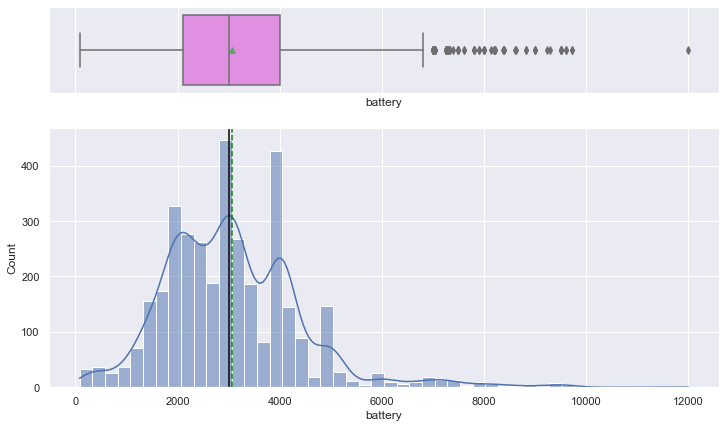

<IPython.core.display.Javascript object>

In [195]:
histogram_boxplot(df, "battery")

In [196]:
df["battery"].describe()

count     3571.000000
mean      3067.112714
std       1363.062572
min         80.000000
25%       2100.000000
50%       3000.000000
75%       4000.000000
max      12000.000000
Name: battery, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Battery distribution is right-skewed
- Mean: ~3067 mAh
- There are several outliers above the upper whisker

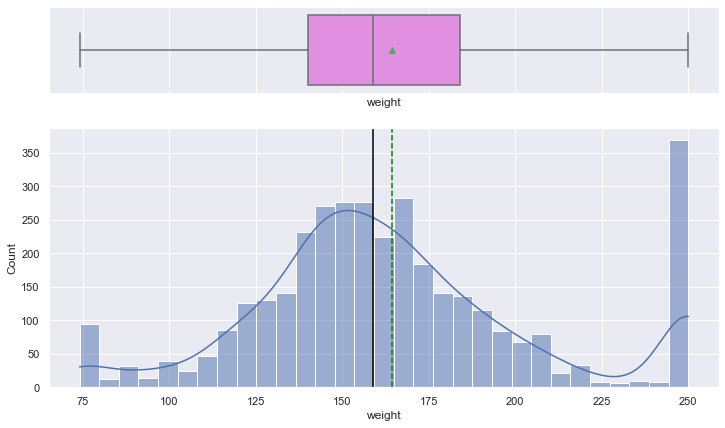

<IPython.core.display.Javascript object>

In [197]:
histogram_boxplot(df, "weight")

In [198]:
df["weight"].describe()

count    3571.000000
mean      164.415584
std        41.098253
min        74.000000
25%       140.000000
50%       159.000000
75%       184.000000
max       250.000000
Name: weight, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Weight appears to follow a normal distribution
- Mean: ~164 grams

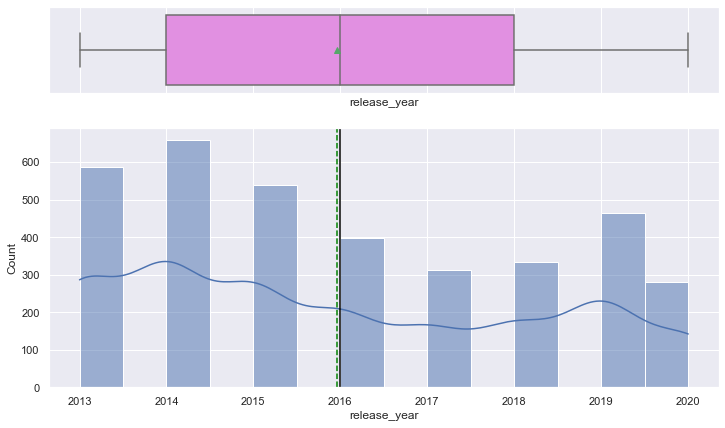

<IPython.core.display.Javascript object>

In [199]:
histogram_boxplot(df, "release_year")

In [200]:
df["release_year"].describe()

count    3571.000000
mean     2015.964996
std         2.291784
min      2013.000000
25%      2014.000000
50%      2016.000000
75%      2018.000000
max      2020.000000
Name: release_year, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Release year is slighlt right-skewed with more newer phones coming to the used phone market
- Mean: ~2016 release year
- No outliers detected

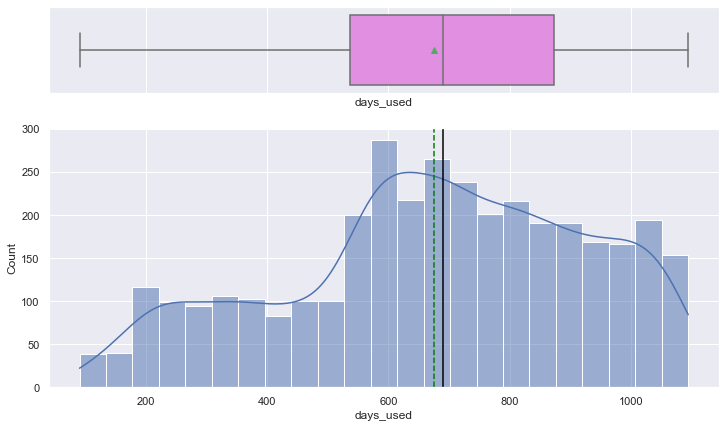

<IPython.core.display.Javascript object>

In [201]:
histogram_boxplot(df, "days_used")

In [202]:
df["days_used"].describe()

count    3571.000000
mean      675.391487
std       248.640972
min        91.000000
25%       536.000000
50%       690.000000
75%       872.000000
max      1094.000000
Name: days_used, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Days used distribution is left-skewed indicating a higher population of phones with more used days on them
- Mean: ~675 days 
- No outliers detected

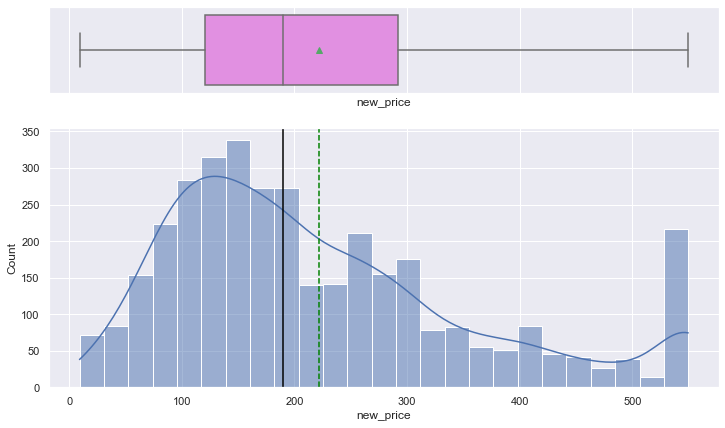

<IPython.core.display.Javascript object>

In [203]:
histogram_boxplot(df, "new_price")

In [204]:
df["new_price"].describe()

count    3571.000000
mean      221.841506
std       135.411699
min         9.130000
25%       120.130000
50%       189.800000
75%       291.935000
max       549.642500
Name: new_price, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- New price still seems to follow a right-skewed distribution however it isnt as strong anymore without the outliers
- Mean: ~222 euros

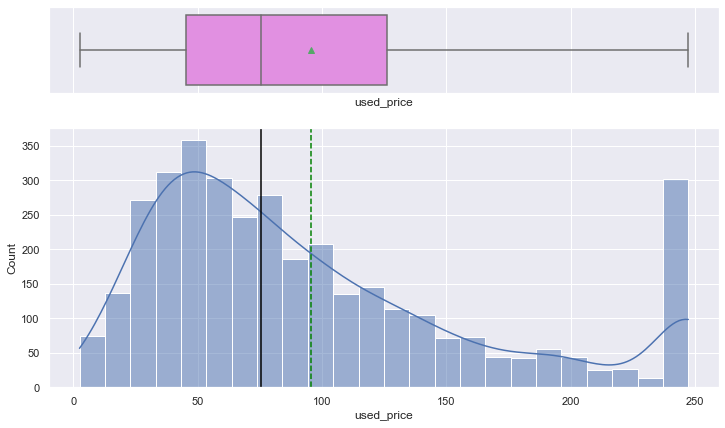

<IPython.core.display.Javascript object>

In [205]:
histogram_boxplot(df, "used_price")

In [206]:
df["used_price"].describe()

count    3571.000000
mean       95.528957
std        66.145611
min         2.510000
25%        45.205000
50%        75.530000
75%       126.000000
max       247.192500
Name: used_price, dtype: float64

<IPython.core.display.Javascript object>

**Observations**
- Used price still seems to follow a right-skewed distribution however not as strong anymore
- Mean: ~96 euros

## Bivariate Analysis

In [89]:
df["used_price_log"] = np.log(df["used_price"])

<IPython.core.display.Javascript object>

In [91]:
df["new_price_log"] = np.log(df["new_price"])

<IPython.core.display.Javascript object>

In [95]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3571,34,Others,509,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3571,4,Android,3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3571.0,NaN,NaN,NaN,14.803892,5.153092,2.7,12.7,13.49,16.51,46.36
4g,3571,2,yes,2359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3571,2,no,3419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3571.0,NaN,NaN,NaN,9.329863,4.705341,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3571.0,NaN,NaN,NaN,6.546486,6.877529,0.3,2.0,5.0,8.0,32.0
int_memory,3571.0,NaN,NaN,NaN,54.469509,84.585924,0.005,16.0,32.0,64.0,1024.0
ram,3571.0,NaN,NaN,NaN,4.056802,1.389897,0.03,4.0,4.0,4.0,16.0
battery,3571.0,NaN,NaN,NaN,3067.112714,1363.062572,80.0,2100.0,3000.0,4000.0,12000.0


<IPython.core.display.Javascript object>

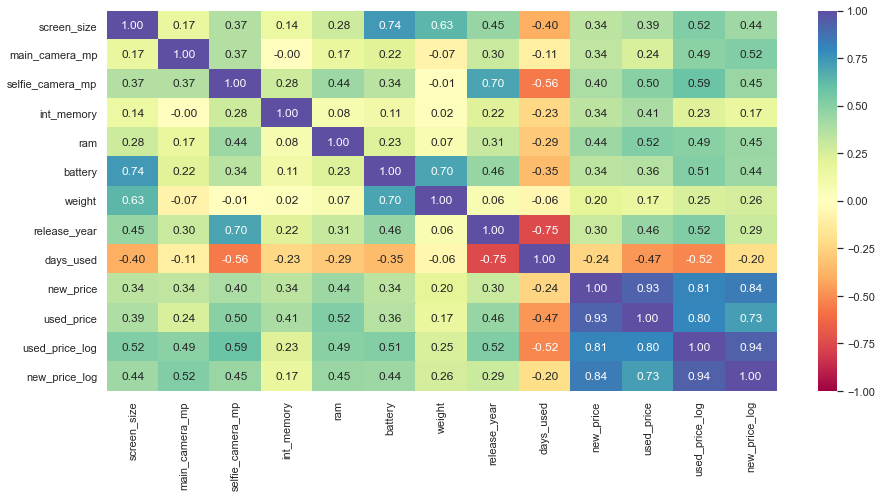

<IPython.core.display.Javascript object>

In [18]:
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral",
)
plt.show()

- Top positively correlated attributes:
    1. `new_price` = 0.91
    2. `selfie_camera_mp` = 0.62
    3. `release_year` = 0.54 


- The only negatively correlated attribute is `days_used` with a strong correlation of -0.55.

***Used_price* vs *days used***

<AxesSubplot:xlabel='days_used', ylabel='used_price'>

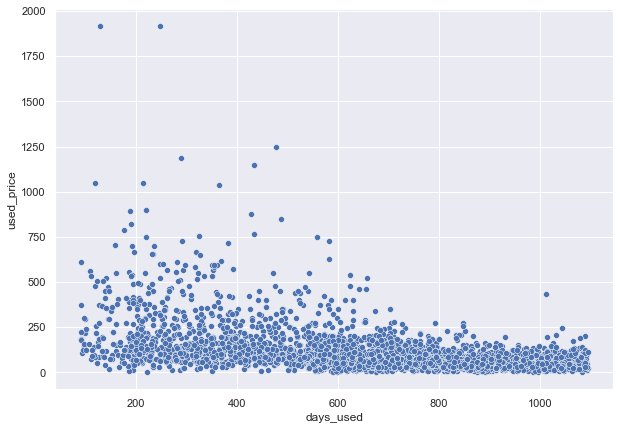

<IPython.core.display.Javascript object>

In [20]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="days_used", y="used_price")

**Observations**
- A negative trend is apparent and confirmed by the correlation heatmap.
- Varation in used price is greater the less number of days a phone is used, whereas variation decreases the more days a phone is used.

***Used_price* vs *new_price***

<AxesSubplot:xlabel='new_price_log', ylabel='used_price_log'>

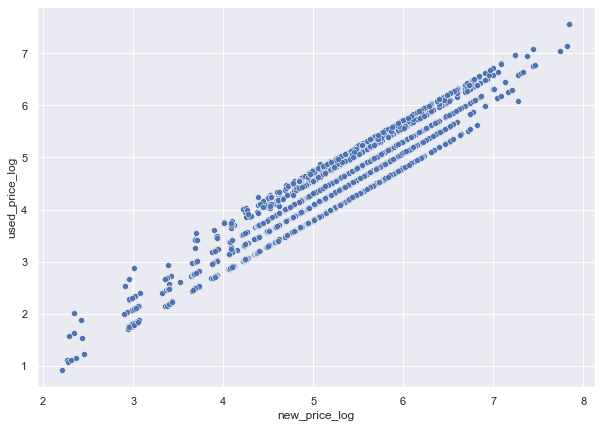

<IPython.core.display.Javascript object>

In [21]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="new_price_log", y="used_price_log")

**Observations**
- The higher new price is, used price increases. A strong positive linear relationship is apparent.
- Varation does increase as new price increases.

***Used_price* vs *selfie_camera_mp***

<AxesSubplot:xlabel='selfie_camera_mp', ylabel='used_price'>

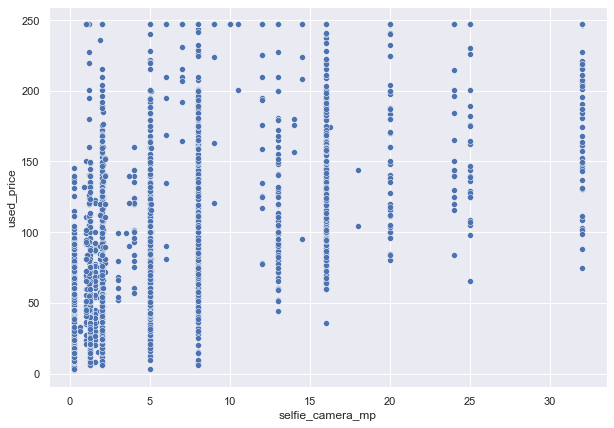

<IPython.core.display.Javascript object>

In [101]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="selfie_camera_mp", y="used_price")

**Observations**
- As selfie camera megapixels increase, the used price also increases.

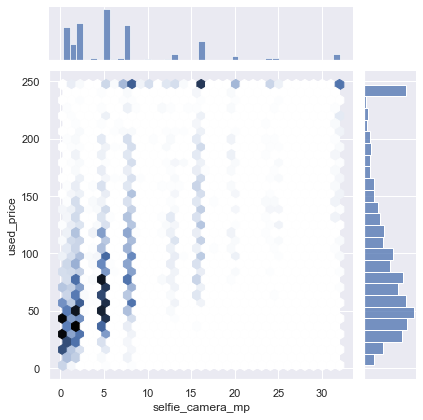

<IPython.core.display.Javascript object>

In [257]:
sns.jointplot(data=df, x="selfie_camera_mp", y="used_price", kind="hex")

**Observations**
- This hex jointplot confirms that as selfie camera megapixels increases used prices are more densely populated at higher prices.

***Used_price* vs *release year***

<AxesSubplot:xlabel='release_year', ylabel='used_price'>

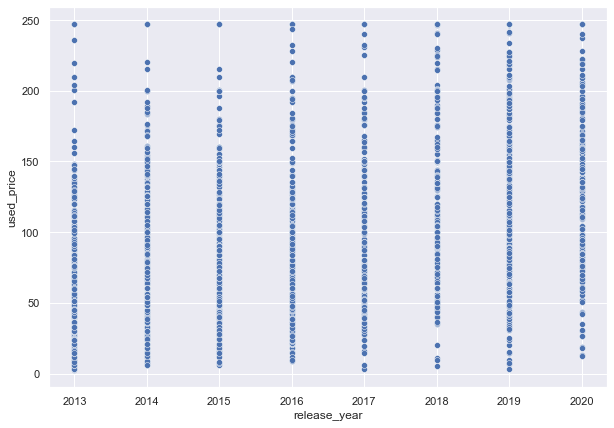

<IPython.core.display.Javascript object>

In [218]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x="release_year", y="used_price")

**Observations**
- There seems to be an increase in used price as the release year increases.

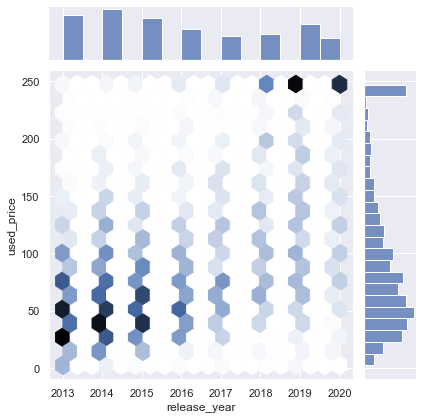

<IPython.core.display.Javascript object>

In [220]:
sns.jointplot(data=df, x="release_year", y="used_price", kind="hex")

**Observations**
- This hex jointplot confirms that as release year increases used prices are more densely populated at higher prices.

## Building a Linear Regression model
1. We want to predict the price for a used phone.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [96]:
# defining X and y variables
X = df.drop(["used_price_log","used_price","new_price"], axis=1)
y = df["used_price_log"]


<IPython.core.display.Javascript object>

In [97]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,new_price_log,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,23.97,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,28.10,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,24.29,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,26.04,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.72,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [98]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [99]:
# checking the shape of both the training and testing data

print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2499
Number of rows in test data = 1072


<IPython.core.display.Javascript object>

In [100]:
# fitting the model on the train data (70% of the whole data)

linearregression = LinearRegression()
linearregression.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

**Let's check the coefficients and intercept of the model.**

In [69]:
coef_df = pd.DataFrame(
    np.append(linearregression.coef_, linearregression.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

round(coef_df, 3)

,Coefficients
screen_size,0.002
main_camera_mp,-0.000
selfie_camera_mp,0.001
int_memory,0.000
ram,0.000
battery,-0.000
weight,-0.000
release_year,0.003
days_used,-0.001
new_price_log,0.996


<IPython.core.display.Javascript object>

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [59]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": np.exp(rmse),
            "MAE": np.exp(mae),
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": np.exp(mape),
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [70]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
linearregression_train_perf = model_performance_regression(
    linearregression, x_train, y_train
)
linearregression_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.085965,1.070966,0.990228,0.990037,5.452611


<IPython.core.display.Javascript object>

In [71]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
linearregression_test_perf = model_performance_regression(
    linearregression, x_test, y_test
)
linearregression_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.087499,1.073885,0.989712,0.989229,5.621075


<IPython.core.display.Javascript object>

**Observations**

- The training $R^2$ is 95.7%, indicating that the model explains 95.7% of the variation in the train data. So, the model is not underfitting.

- MAE and RMSE on the train and test sets are comparable, which shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used phone prices within a mean error of 10.4 euros on the test data.

- MAPE on the test set suggests we can predict within 18.4% of used phone prices.

## Model performance evaluation

In [72]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train1 = sm.add_constant(x_train)
# adding constant to the test data
x_test1 = sm.add_constant(x_test)

olsmod0 = sm.OLS(y_train, x_train1).fit()
print(olsmod0.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5172.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:58:04   Log-Likelihood:                 2689.9
No. Observations:                2499   AIC:                            -5282.
Df Residuals:                    2450   BIC:                            -4996.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.18

<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient show that *used_price* decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that *used_price* increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

- So, we need to deal with multicollinearity and check the other assumptions of linear regression first, and then look at the p-values.

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

<IPython.core.display.Javascript object>

In [33]:
round(checking_vif(x_train1), 3)

,feature,VIF
0,const,3550032.735
1,screen_size,3.342
2,main_camera_mp,2.150
3,selfie_camera_mp,2.853
4,int_memory,1.275
5,ram,1.787
6,battery,3.713
7,weight,3.107
8,release_year,4.600
9,days_used,2.647


<IPython.core.display.Javascript object>

* *brand_name_Huawei*, *brand_name_LG*, *brand_name_Others*, and *brand_name_Samsung* have VIF slightly greater than 5.
* *ram*, *brand_name_apple*, and *os_iOS* have a VIF score of much greater than 5.
* Clearly *brand_name_apple* and *os_iOS* are correlated with each other.
* This does seem to make sense given that only Apple phones operate under the iOS ecosystem. 

### Removing Multicollinearity (Stepwise Regression)

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [34]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

<IPython.core.display.Javascript object>

In [35]:
col_list = [
    "brand_name_Apple",
    "brand_name_Huawei",
    "brand_name_LG",
    "brand_name_Others",
    "brand_name_Samsung",
    "os_iOS",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Huawei,0.990040,0.083278
1,brand_name_LG,0.990031,0.083314
2,os_iOS,0.990031,0.083314
3,brand_name_Others,0.990031,0.083315
4,brand_name_Samsung,0.990027,0.083330
5,brand_name_Apple,0.990027,0.083331


<IPython.core.display.Javascript object>

* Dropping *brand_name_Huawei* would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* We'll drop *brand_name_Huawei* and check the VIF again.

In [36]:
col_to_drop = "brand_name_Huawei"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
round(vif, 3)

VIF after dropping  brand_name_Huawei


,feature,VIF
0,const,3547057.070
1,screen_size,3.342
2,main_camera_mp,2.150
3,selfie_camera_mp,2.849
4,int_memory,1.274
5,ram,1.787
6,battery,3.713
7,weight,3.106
8,release_year,4.595
9,days_used,2.647


<IPython.core.display.Javascript object>

In [37]:
col_list = [
    "brand_name_Apple",
    "os_iOS",
]

res = treating_multicollinearity(x_train2, y_train, col_list)
round(res, 5)

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.99003,0.08330
1,brand_name_Apple,0.99003,0.08331


<IPython.core.display.Javascript object>

* Dropping *brand_name_Apple* would have the maximum impact on the predictive power of the model (amongst the variables being considered).
* We'll drop *brand_name_Apple* and check the VIF again.

In [38]:
col_to_drop = "os_iOS"
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
round(vif, 3)

VIF after dropping  os_iOS


,feature,VIF
0,const,3546288.516
1,screen_size,3.337
2,main_camera_mp,2.146
3,selfie_camera_mp,2.844
4,int_memory,1.273
5,ram,1.779
6,battery,3.711
7,weight,3.100
8,release_year,4.594
9,days_used,2.646


<IPython.core.display.Javascript object>

**The above predictors have no multicollinearity and the assumption is satisfied.**

Let's check the model performance.

In [39]:
# # unlike sklearn, statsmodels does not add a constant to the data on its own
# # we have to add the constant manually
x_train4 = sm.add_constant(x_train3)
# # adding constant to the test data
x_test4 = sm.add_constant(x_test3)

olsmod1 = sm.OLS(y_train, x_train4).fit()
print(olsmod1.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5396.
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:29:32   Log-Likelihood:                 2688.5
No. Observations:                2499   AIC:                            -5283.
Df Residuals:                    2452   BIC:                            -5009.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -6.31

<IPython.core.display.Javascript object>

**Observations**

- We can see that adj. R-squared has remained the exact same at about 0.956, which shows that the dropped columns had no effect on the model.
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.


- *battery*, *weight*, *release_year*, *brand_name_Alcatel*, *brand_name_Asus*, *brand_name_Celkon*, *brand_name_Coolpad*, *brand_name_Gionee*, *brand_name_HTC*, *brand_name_Honor*, *brand_name_Karbonn*, *brand_name_LG*, *brand_name_Meizu*,  *brand_name_Micromax*, *brand_name_Microsoft*, *brand_name_Motorola*, *brand_name_Oppo*, *brand_name_Others*, *brand_name_Panasonic*, *brand_name_Realme*, *brand_name_Samsung*, *brand_name_Sony*, *brand_name_Spice*, *brand_name_Vivo*, *brand_name_XOLO*, *brand_name_Xiaomi*, *brand_name_ZTE*, *os_Others*, *os_Windows*,and *5g_yes* have p-value > 0.05. So, they are not significant and we'll drop them.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [104]:
# initial list of columns
cols = x_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = x_train1[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'selfie_camera_mp', 'days_used', 'new_price_log', 'brand_name_Gionee', 'brand_name_Panasonic', '5g_yes']


<IPython.core.display.Javascript object>

In [40]:
# # initial list of columns
# cols = x_train4.columns.tolist()

# # setting an initial max p-value
# max_p_value = 1

# while len(cols) > 0:
#     # defining the train set
#     x_train_aux = x_train4[cols]

#     # fitting the model
#     model = sm.OLS(y_train, x_train_aux).fit()

#     # getting the p-values and the maximum p-value
#     p_values = model.pvalues
#     max_p_value = max(p_values)

#     # name of the variable with maximum p-value
#     feature_with_p_max = p_values.idxmax()

#     if max_p_value > 0.05:
#         cols.remove(feature_with_p_max)
#     else:
#         break

# selected_features = cols
# print(selected_features)

['const', 'screen_size', 'selfie_camera_mp', 'days_used', 'new_price_log', 'brand_name_Gionee', 'brand_name_Lenovo', 'brand_name_Panasonic', '5g_yes']


<IPython.core.display.Javascript object>

In [105]:
x_train2 = x_train1[selected_features]
x_test2 = x_test1[selected_features]

<IPython.core.display.Javascript object>

In [42]:
# unlike sklearn, statsmodels does not add a constant to the data on its own
# we have to add the constant manually
x_train6 = sm.add_constant(x_train5)
# adding constant to the test data
x_test6 = sm.add_constant(x_test5)

<IPython.core.display.Javascript object>

In [106]:
olsmod2 = sm.OLS(y_train, x_train2).fit()
print(olsmod2.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.538e+04
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:24:02   Log-Likelihood:                 2666.2
No. Observations:                2499   AIC:                            -5316.
Df Residuals:                    2491   BIC:                            -5270.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1225 

<IPython.core.display.Javascript object>

**Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train6* as the final ones and *olsmod2* as final model.**

**Observations**

* Now adjusted R-squared is still 0.956, i.e., our model is able to explain ~96% of the variance. This shows that the model is good.
* The adjusted R-squared in *olsmod0* (where we considered all the variables) was 0.956. This shows that the variables we dropped were not affecting the model much.

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**

* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.
* The independence of the error terms (or residuals) is important. If the residuals are not independent, then the confidence intervals of the coefficient estimates will be narrower and make us incorrectly conclude a parameter to be statistically significant.

**How to check linearity and independence?**

- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear.

In [76]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
1248,4.593806,4.610658,-0.016853
2206,4.887488,4.867790,0.019698
1623,3.229618,3.315377,-0.085759
2245,4.646888,4.563848,0.083040
1043,3.669187,3.777065,-0.107878


<IPython.core.display.Javascript object>

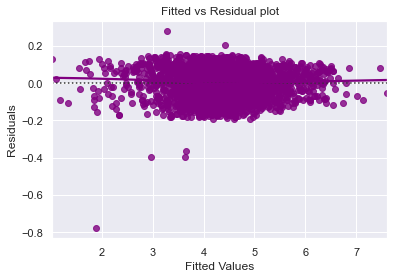

<IPython.core.display.Javascript object>

In [77]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="Purple", lowess=True,
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**Why the test?**

* Error terms, or residuals, should be normally distributed. If the error terms are not normally distributed, confidence intervals of the coefficient estimates may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares. Non-normality suggests that there are a few unusual data points that must be studied closely to make a better model.

**How to check normality?**

* The shape of the histogram of residuals can give an initial idea about the normality.
* It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
* Other tests to check for normality includes the Shapiro-Wilk test.
    - Null hypothesis: Residuals are normally distributed
    - Alternate hypothesis: Residuals are not normally distributed

**How to fix if this assumption is not followed?**

* We can apply transformations like log, exponential, arcsinh, etc. as per our data.

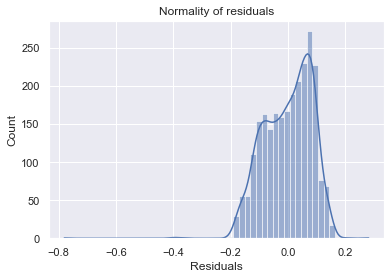

<IPython.core.display.Javascript object>

In [78]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

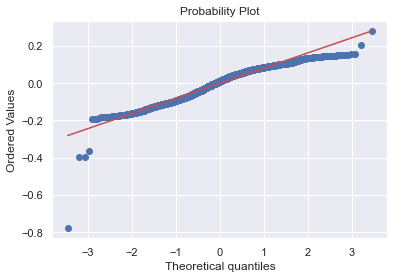

<IPython.core.display.Javascript object>

In [79]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [48]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9564380049705505, pvalue=1.0358051063971009e-26)

<IPython.core.display.Javascript object>

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* **Homoscedascity**: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

* **Heteroscedascity**: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

**Why the test?** 

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [49]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train6)
lzip(name, test)

[('F statistic', 0.9182309798181217), ('p-value', 0.9334164028218899)]

<IPython.core.display.Javascript object>

**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

In [50]:
# predictions on the test set
pred = olsmod2.predict(x_test6)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
255,5.270175,5.305914
1398,5.137209,5.088200
2253,5.104490,5.167668
579,3.665867,3.805832
3123,3.808439,3.783066
1959,3.932806,4.037091
3111,3.690628,3.587171
1456,4.002777,3.944558
3332,4.554508,4.542341
855,3.784871,3.732818


<IPython.core.display.Javascript object>

- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable.

- We can also visualize comparison result as a bar graph.

**Note**: As the number of records is large, for representation purpose, we are taking a sample of 25 records only.

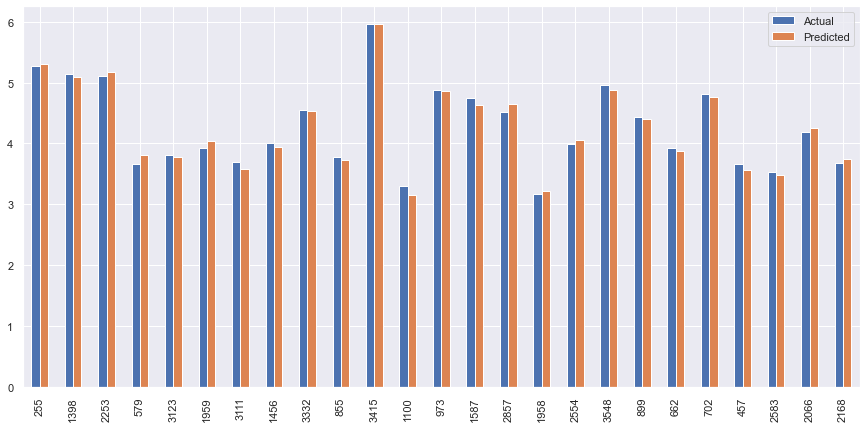

<IPython.core.display.Javascript object>

In [51]:
df1 = df_pred_test.sample(25, random_state=1)
df1.plot(kind="bar", figsize=(15, 7))
plt.show()

In [80]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train2, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.086819,1.072041,0.990041,0.990009,5.588011


<IPython.core.display.Javascript object>

In [81]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test2, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,1.086136,1.072868,0.990017,0.989942,5.476656


<IPython.core.display.Javascript object>

* The model is able to explain ~95% of the variation in the data, which is very good.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 18.2% of used phone prices. 

* Hence, we can conclude the model *olsmod2* is good for prediction as well as inference purposes.

**Let's compare the initial model created with sklearn and the final statsmodels model.**

In [82]:
# training performance comparison

models_train_comp_df = pd.concat(
    [linearregression_train_perf.T, olsmod2_train_perf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,1.085965,1.086819
MAE,1.070966,1.072041
R-squared,0.990228,0.990041
Adj. R-squared,0.990037,0.990009
MAPE,5.452611,5.588011


<IPython.core.display.Javascript object>

In [83]:
# test performance comparison

models_test_comp_df = pd.concat(
    [linearregression_test_perf.T, olsmod2_test_perf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression statsmodels",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression statsmodels
RMSE,1.087499,1.086136
MAE,1.073885,1.072868
R-squared,0.989712,0.990017
Adj. R-squared,0.989229,0.989942
MAPE,5.621075,5.476656


<IPython.core.display.Javascript object>

* The performance of the two models is close to each other.

**Let's recreate the final statsmodels model and print it's summary to gain insights.**

In [56]:
olsmodel_final = sm.OLS(y_train, x_train6).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:         used_price_log   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.105e+04
Date:                Mon, 25 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:32:24   Log-Likelihood:                 2670.5
No. Observations:                2499   AIC:                            -5323.
Df Residuals:                    2490   BIC:                            -5271.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1220 

<IPython.core.display.Javascript object>

## Final Model Summary

1. `screen_size` is statistically significant, it has a positive correlation. Therefore as the screen size of a used phone increases so does the used price.


2. Camera megapixels for used phones is split. 
    * `main_camera_mp` is negatively correlated indicating that as the megapixels of the main camera setup increase by one unit, the used price decreases by a factor of ~0.413 euros. 
    * On the other hand, `selfie_camera_setup` is positively correlated. For every one unit increase in megapixels of the selfie camera setup, the used price increases by a factor of ~0.8346 euros. 


3. `int_memory` and `ram` are both positively correlated however a used phone's ram size is valued more than its internal memory. 
    * One unit increase in `ram` increases the used price by about 0.7765 euros.
    * One unit increase in `int_memory` increases the used price by about 0.0141 euros. 


4. `new_price` is positively correlated so as a used phone's original price increases, used price also increases. 


5. A used phone's brand name has both negative and positive correlations.
    * Positively correlated brand names in descending order:
        * `brand_name_Google` valued at ~15.71 euros followed by `os_iOS` which are **Apple iPhones** valued at ~8.51 euros and `brand_name_BlackBerry` equal to ~8.26 euros. 
    * Negatively correlated brand names in descedning order:
        * `brand_name_Infinix` decreases used price by a factor of ~16.13 euros. Followed by brand names `OnePlus`, `Nokia`, `Gionee`, `Lenovo`, and `Oppo`.


6. Finally, `4g_yes` or 4g capability actually decreases the used price by a factor of ~2.14 euros.

## Actionable Insights and Recommendations

### Insights
- **Observation A:** On average statistically significant brand names with a NEGATIVE correlation outsell POSITIVELY correlated brand names.

| Brand Name | Google+ | Apple+ | BlackBerry+ | Infinix- | OnePlus- | Nokia- | Gionee- | Lenovo- | Oppo- |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| **Num of Sales** | 15 | 59 | 22 | 10 | 22 | 121 | 56 | 172 | 129 |
|  |  |  |  |  |  |  |  |  |  |
| **OLS Model Coeff** (euros) | 15.7137 | 8.5067 | 8.2550 | -16.1283 | -12.5614 | -9.1880 | -5.0398 | -3.3736 | -3.3216 |


|  | Negative | Positive |
| --- | --- | --- |
| **Population Size** | 84% | 16% |


|  | Negative | Positive |
| --- | --- | --- |
| **Avg. Sales** | 85 | 32 |

- **Observation B:** The average screen size sold is about 14.5 cm, however the majority of customers, 61%, buy used phones with a screen size less than 14.5 cm.

| Screen Size | <14.5 | >14.5 |
| --- | --- | --- |
| **Count** | 2188 | 1383 |

- **Observation C:** A used phone's main camera megapixels is hurting the combined profit of the phone's camera system. 

| | Main Camera | Selfie Camera |
| --- | --- | --- |
| **OLD Model Coeff** (euros) | -0.4130 | 0.8346 |


| | Main Camera | Selfie Camera |
| --- | --- | --- |
| **Avg. MP x OLS Model Coeff** (euros) | -3.85 | 5.47 |
|  |  |  |
| **Avg. Estimated Net Profit** (euros) | 1.61 | |

- **Observation D:** The ram storage of a used phone holds more profit than its internal memory. 

| | RAM | Internal Memory |
| --- | --- | --- |
| **OLS Model Coeff** (euros) | 0.7765 | 0.0141 |

| | RAM | Internal Memory |
| --- | --- | --- |
| **Avg. x OLS Model Coeff** (euros) | 3.15 | 0.77 |


- **Observation E:** The number of days a phone has been used depreciates the new price.

| | New Price | Days Used |
| --- | --- | --- |
| **OLS Model Coeff** (euros) | 0.3855 | -0.0842 |


| | New Price | Days Used |
| --- | --- | --- |
| **Avg. x OLS Model Coeff** (euros) | 85.5 | -56.9 |
|  |  |  |
| **Avg. Estimated Net Profit** (euros) | 28.7 | |

- **Observation F:** Used phones with 4G capability account for about 66% of ReCell's market, however the value of a used phones decreases by a factor of ~2.14 euros when 4g enabled.

| 4G Capability | Yes | No |
| --- | --- | --- |
| **Count** | 2359 | 1212 |

    Now, consider those 4g enabled phones (2359) and whether they are 5g enabled or not.

| 5G Capability | Yes | No |
| --- | --- | --- |
| **Count** | 152 | 2207 |


### Recommendations
- **Suggestion A:** To increase monetary for POSITIVELY correlated brand names, the number of sales has to increase and ideally outperform those of NEGATIVELY correlated brand names.
    - *Method 1:* Identify the supply and demand factor of the positively correlated brand names. 
        - If the customer does demand these specific brands then increase supply.
        - If customers are not in high demand of these brands, then develop some marketing strategy to encourage customers to buy from these high profit brands.
    - *Method 2:* Increase the customer base already buying from these low profit brand names.
        - Increase the number of sales of the lowest negatively correlated brands.
        - Decrease maybe even discontinue sales of the highest negatively correlated brands if they are not bringing in a substantial profit.


- **Suggestion B:** Increase the frequency of customers buying a phone with a screen size greater than 14.5 cm.
    - *Method 1:* Develop an ad campaign encouraging customers to buy a bigger screen size phone.
    - *Method 2:* For customers who do want a bigger screen size phone, increase monetary buy offering them some accessories to buy along with the phone.


- **Suggestion C:** Maximize the net profit of a used phones' camera system.
    - *Method 1:* Build up a bigger supply of used phones with more megapixels in the selfie camera.


- **Suggestion D:** Maximize the net profit of a used phones' storage capacity.
    - *Method 1:* Branch out to other markets, used phones with more ram storage, since they significantly increase profit.


- **Suggestion E:** The relationship between new price and days used of a phone is simple, depreciation.
    - *Method 1:* Increase the supply of newer phones and develop ad campaigns encouraging customers to buy a newer phone model.


- **Suggestion F:** Most people expect 4g capability a standard now, which could explain the descrease in value.
    - *Method 1:* Initiate a campaign to supply more 5g enabled used phones and encourage customers to make the switch to 5g connectivity.